# Table of Contents
1. [Predict Freight Using BDI](#Trying-to-Predict-Freight-Using-BDI)
2. [Predict China Coal Using BDI](#Use-BDI-to-predict-China-Coal)
3. [Lead of BDI to Coal](#BDI-leading-coal-by-x-days)
4. [Predict China Coal Using BDI & Freight](#BDI-and-freight-to-predict-coal)
5. [Other Ideas](#Other-Ideas-I-thought-of)
6. [Predict Coal with BDI 2/18/00 - 2/27/04](#In-predicting-coal-with-just-BDI-since-we-are-back-predicting-and-the-models-weren't-the-greatest-earlier-on-in-time-I-am-going-to-make-a-model-from-2/18/2000---2/27/2004)
7. [Predict China Coal Using Dollar & Freight](#Now-going-to-predict-coal-using-dollar-and-freight)
8. [Predict China Coal Using Dollar & BDI](#I-am-now-curious-if-just-had-dollar-and-BDI,-so-I-would-need-dollar-values-from-2005-2012,-I-think-this-would-predict-China-coal-better)
9. [Predict Freight Using Dollar & BDI](#Using-BDI-and-Dollar-to-Predict-Freight)

# Trying to Predict Freight Using BDI
[Top](#Table-of-Contents)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/coalfreightbdi.csv")
freight = data[['Date','BDI','Freight']]
freight = freight.dropna()
print(freight.shape)
freightnew = np.array(freight)
freightnew = pd.DataFrame(freightnew)
freightnew.columns = ['Date','BDI','Freight']
freightnew

(1006, 3)


,Date,BDI,Freight
0,1/5/1996,1583,4.15
1,1/12/1996,1550,4.55
2,1/19/1996,1538,4.55
3,1/26/1996,1529,4.55
4,2/2/1996,1484,4.6
5,2/9/1996,1453,4.6
6,2/16/1996,1437,4.15
7,2/23/1996,1400,4.25
8,3/1/1996,1357,4.35
9,3/8/1996,1350,5.5


In [3]:
freight.describe()

,BDI,Freight
count,1006.000000,1006.000000
mean,2391.473161,13.362117
std,2063.566624,10.457040
min,513.000000,3.500000
25%,1049.000000,6.500000
50%,1514.000000,10.450000
75%,2904.750000,16.225000
max,11612.000000,73.350000


In [4]:
freight.corr() #nice correlation

,BDI,Freight
BDI,1.00000,0.95391
Freight,0.95391,1.00000


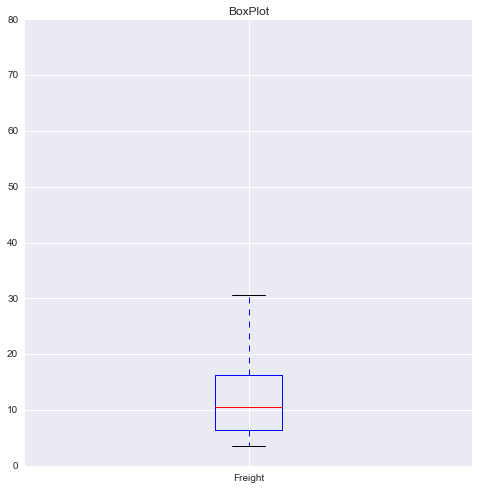

In [6]:
plt.show(freightnew['Freight'].plot(kind='box',figsize=(8,8),title=('BoxPlot'))) 
#both freight and BDI had no apparent outliers

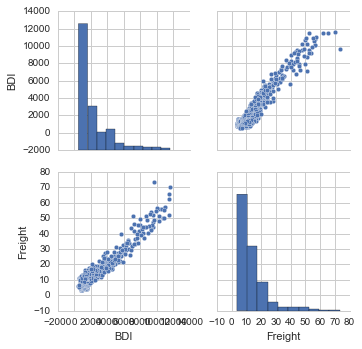

In [7]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
sns.pairplot(freight, size=2.5);
plt.show()
#freight and BDI positively skewed

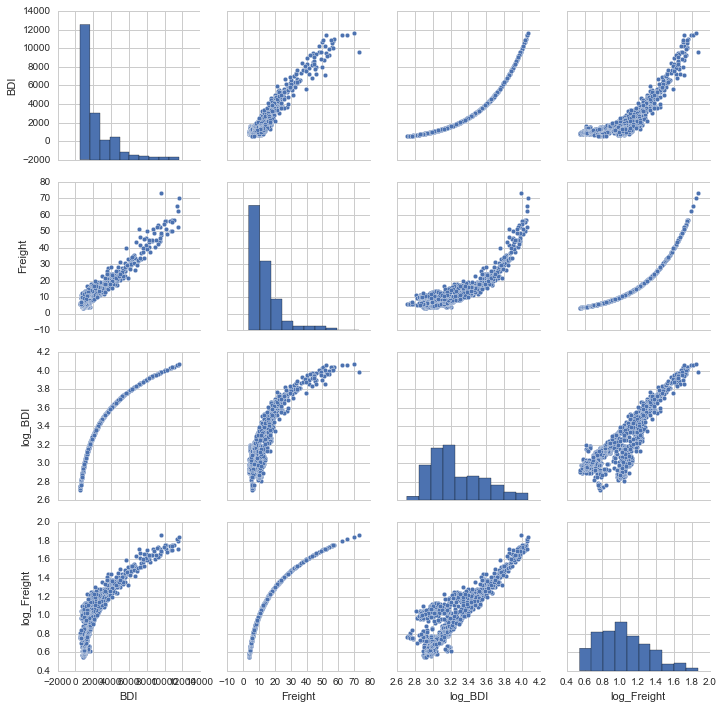

In [25]:
freightmore = data[['Date','BDI','Freight','log_BDI','log_Freight']]
freightmore = freightmore.dropna()
sns.set(style='whitegrid', context='notebook')
sns.pairplot(freightmore, size=2.5);
plt.show()

In [26]:
from datetime import datetime
freightnew['Date'] = pd.to_datetime(freightnew['Date'])
date = freightnew['Date']
freightnew.dtypes

Date       datetime64[ns]
BDI                object
Freight            object
dtype: object

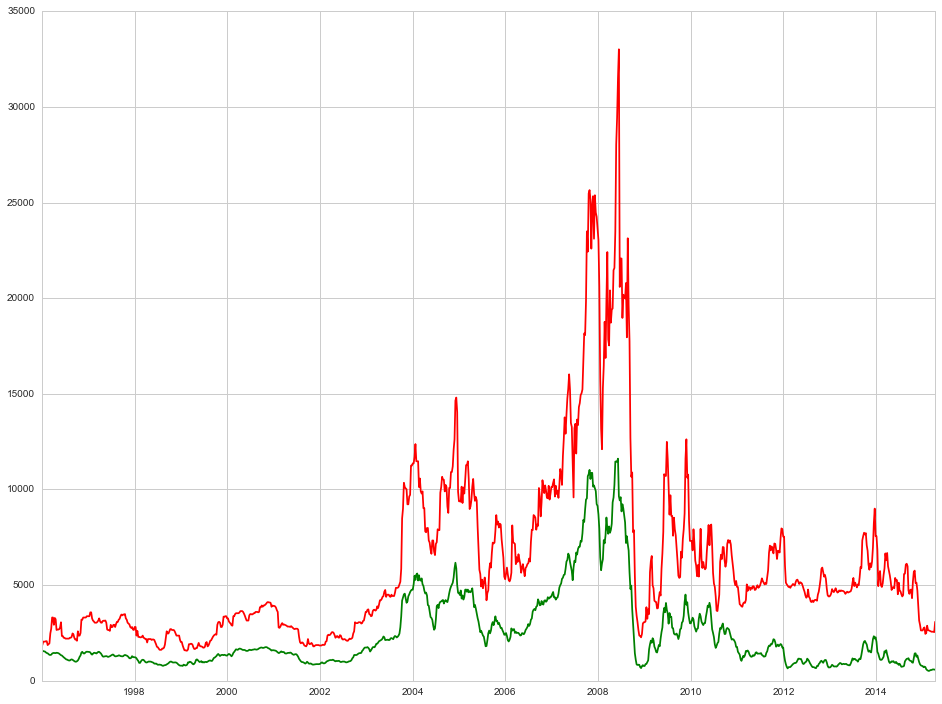

In [14]:
#trend
x = date
y1 = (freightnew['BDI'])
y2 = (freightnew['Freight'])*450

plt.figure(figsize=(16,12))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')

plt.show()

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with intercept on BDI to predict freight
X = freight[['BDI']]
Y = freight[['Freight']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

NameError: name 'freight' is not defined

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


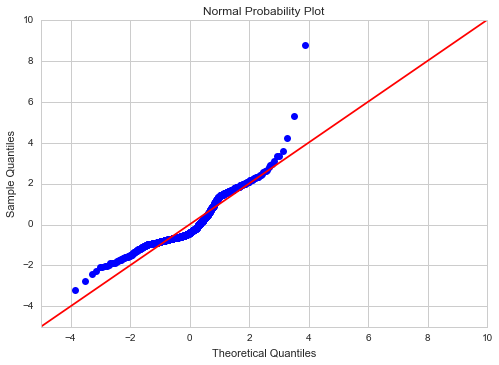

In [17]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = freightmore[['log_BDI']]
Y = freightmore[['log_Freight']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_Freight   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     3173.
Date:                Thu, 24 Mar 2016   Prob (F-statistic):          4.48e-313
Time:                        07:12:26   Log-Likelihood:                 577.70
No. Observations:                1006   AIC:                            -1151.
Df Residuals:                    1004   BIC:                            -1142.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.6323      0.047    -34.408      0.000        -1.725    -1.539
log_BDI        0.8154      0.014     56.330      0.000         0.787     0.844
==============================================================================
Omnibus:                       51.965   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.619
Skew:                           0.550   Prob(JB):                     8.36e-13
Kurtosis:                       2.658   Cond. No.                         39.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


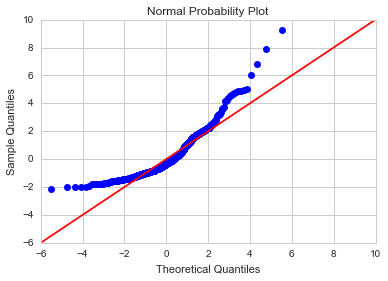

In [34]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()

### Using RDF Now

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X=freightnew[['BDI']].values
y=freightnew['Freight'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [44]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [46]:
#do multiple times to see what parameters are the best
rdf_model_freight = fit_predict_model(X_train,y_train)
print (rdf_model_freight.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [7]:
X=freightnew[['BDI']].values
y=freightnew['Freight'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 6.428, test: 10.387
R^2 train: 0.938, test: 0.915


### Summary of RDF model vs LR model

In [27]:
freight_predicted = forest.predict(X)
freight_predicted = pd.DataFrame(freight_predicted)
freight_predicted.columns = ['Predicted_Freight']
freightnew['Predicted_Freight'] = freight_predicted
rdf_error = (abs(freightnew['Predicted_Freight'] - freightnew['Freight'])/freightnew['Freight'])*100
freightnew['RDF_Error'] = rdf_error
lr_predicted = 1.8020 + (freightnew['BDI']*0.0048)
freightnew['Predicted_Freight_LR'] = lr_predicted
lr_error = (abs(freightnew['Predicted_Freight_LR'] - freightnew['Freight'])/freightnew['Freight'])*100
freightnew['LR_Error'] = lr_error
predicted_transform = 10**(-1.6323 + (freightmore['log_BDI']*0.8154))
freightnew['Predicted_Freight_Trans'] = predicted_transform
trans_error = (abs(freightnew['Predicted_Freight_Trans'] - freightnew['Freight'])/freightnew['Freight'])*100
freightnew['Trans_Error'] = trans_error

print("Average RDF error is: %.3f" % (rdf_error.mean())) #this model looks worse than 
print("Average LR error is: %.3f" % (lr_error.mean()))
print("Average Trans error is: %.3f" % (trans_error.mean()))
freightnew

Average RDF error is: 23.280
Average LR error is: 25.140
Average Trans error is: 25.320


,Date,BDI,Freight,Predicted_Freight,RDF_Error,Predicted_Freight_LR,LR_Error,Predicted_Freight_Trans,Trans_Error
0,1996-01-05,1583,4.15,8.168751,96.8374,9.4004,126.516,9.474510,128.301
1,1996-01-12,1550,4.55,8.168751,79.533,9.242,103.121,9.313147,104.685
2,1996-01-19,1538,4.55,8.219574,80.65,9.1844,101.855,9.254313,103.391
3,1996-01-26,1529,4.55,8.226061,80.7926,9.1412,100.905,9.210132,102.42
4,1996-02-02,1484,4.6,8.225133,78.8072,8.9252,94.0261,8.988500,95.4022
5,1996-02-09,1453,4.6,7.979304,73.4631,8.7764,90.7913,8.835098,92.0674
6,1996-02-16,1437,4.15,8.006711,92.9328,8.6996,109.629,8.755687,110.98
7,1996-02-23,1400,4.25,7.932088,86.6374,8.522,100.518,8.571420,101.68
8,1996-03-01,1357,4.35,7.919537,82.0583,8.3156,91.1632,8.356138,92.0951
9,1996-03-08,1350,5.5,7.927192,44.1308,8.282,50.5818,8.320974,51.2904


In [14]:
from datetime import datetime
freightnew['Date'] = pd.to_datetime(freightnew['Date'])
date = freightnew['Date']

In [28]:
newpred2 = data [['Date','BDI','log_BDI']][1006:]
newpred = data [['BDI']][1006:]
newpred2

,Date,BDI,log_BDI
1006,4/17/2015,597,2.775974
1007,4/24/2015,600,2.778151
1008,5/1/2015,587,2.768638
1009,5/8/2015,574,2.758912
1010,5/15/2015,634,2.802089
1011,5/22/2015,586,2.767898
1012,5/29/2015,589,2.770115
1013,6/5/2015,610,2.785330
1014,6/12/2015,642,2.807535
1015,6/19/2015,779,2.891537


In [29]:
#new predictions
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date', 'BDI','log_BDI']
lr_predictednew = 1.8020 + (newpred2['BDI']*0.0048)
newpred2['Predicted_Freight_LR'] = lr_predictednew
trans_predictednew = 10**(-1.6323 + (newpred2['log_BDI']*0.8154))
newpred2['Predicted_Freight_Trans'] = trans_predictednew
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Predicted_Freight'] = df_new_pred
newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

,Date,BDI,log_BDI,Predicted_Freight_LR,Predicted_Freight_Trans,Predicted_Freight
0,2015-04-17,597,2.77597,4.6676,4.27789,7.531709
1,2015-04-24,600,2.77815,4.682,4.29541,7.531709
2,2015-05-01,587,2.76864,4.6196,4.21937,7.531709
3,2015-05-08,574,2.75891,4.5572,4.14302,7.531709
4,2015-05-15,634,2.80209,4.8452,4.49287,8.095648
5,2015-05-22,586,2.7679,4.6148,4.21351,7.531709
6,2015-05-29,589,2.77012,4.6292,4.23109,7.531709
7,2015-06-05,610,2.78533,4.73,4.35369,7.531709
8,2015-06-12,642,2.80754,4.8836,4.53904,8.181401
9,2015-06-19,779,2.89154,5.5412,5.31447,7.320952


In [30]:
frames = [freightnew,newpred2]
combined = pd.concat(frames)
combined

,BDI,Date,Freight,LR_Error,Predicted_Freight,Predicted_Freight_LR,Predicted_Freight_Trans,RDF_Error,Trans_Error,log_BDI
0,1583,1996-01-05,4.15,126.516,8.168751,9.4004,9.47451,96.8374,128.301,NaN
1,1550,1996-01-12,4.55,103.121,8.168751,9.242,9.31315,79.533,104.685,NaN
2,1538,1996-01-19,4.55,101.855,8.219574,9.1844,9.25431,80.65,103.391,NaN
3,1529,1996-01-26,4.55,100.905,8.226061,9.1412,9.21013,80.7926,102.42,NaN
4,1484,1996-02-02,4.6,94.0261,8.225133,8.9252,8.9885,78.8072,95.4022,NaN
5,1453,1996-02-09,4.6,90.7913,7.979304,8.7764,8.8351,73.4631,92.0674,NaN
6,1437,1996-02-16,4.15,109.629,8.006711,8.6996,8.75569,92.9328,110.98,NaN
7,1400,1996-02-23,4.25,100.518,7.932088,8.522,8.57142,86.6374,101.68,NaN
8,1357,1996-03-01,4.35,91.1632,7.919537,8.3156,8.35614,82.0583,92.0951,NaN
9,1350,1996-03-08,5.5,50.5818,7.927192,8.282,8.32097,44.1308,51.2904,NaN


In [32]:
combined.to_csv("C:/Users/msteinme/Documents/freight.csv")

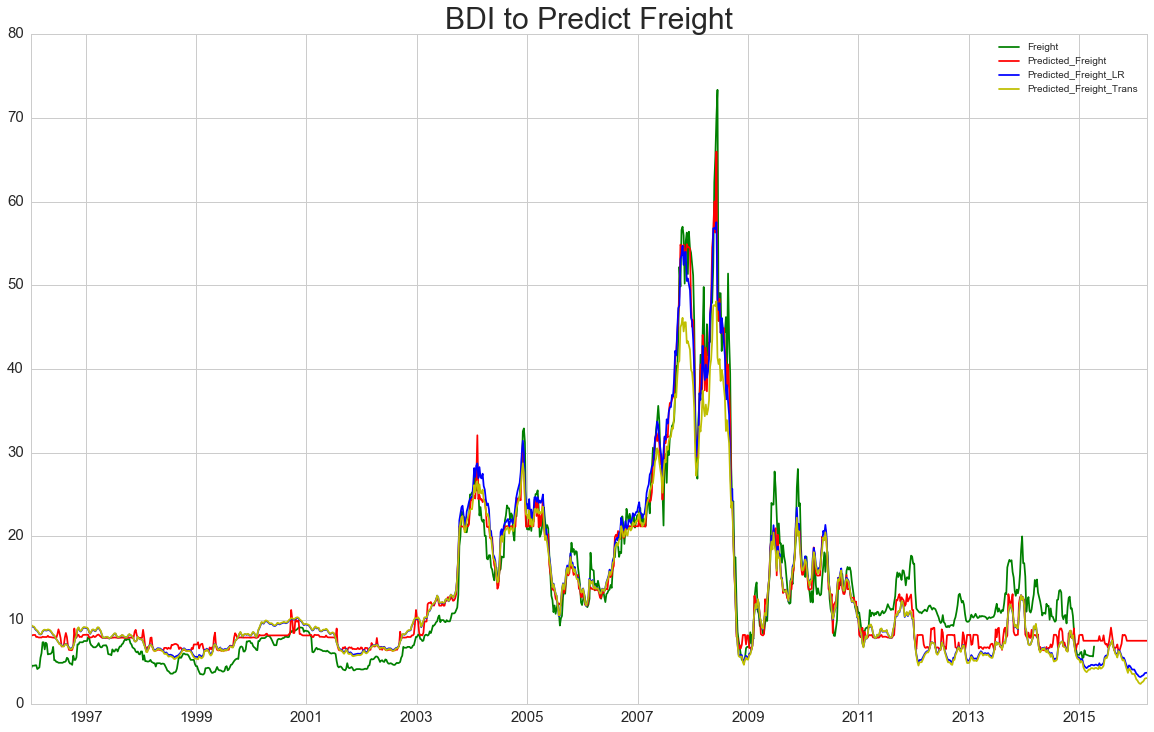

In [31]:
x = (combined['Date'])
y1 = (combined['Freight'])
y2 = (combined['Predicted_Freight'])
y3 = (combined['Predicted_Freight_LR'])
y4 = (combined['Predicted_Freight_Trans'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'r')
ax.plot(x,y3,'b')
ax.plot(x,y4,'y')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('BDI to Predict Freight', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show()

# Use BDI to predict China Coal 
[Top](#Table-of-Contents)

In [76]:
coal = data[['Date','BDI','Coal','log_BDI','log_Coal']]
coal = coal.dropna()
print(coal.shape)
coalnew = np.array(coal)
coalnew = pd.DataFrame(coalnew)
coalnew.columns = ['Date','BDI','Coal','log_BDI','log_Coal']
coalnew

(841, 5)


,Date,BDI,Coal,log_BDI,log_Coal
0,2/18/2000,1454,21.3,3.16256,1.32838
1,2/25/2000,1511,21.3,3.17926,1.32838
2,3/3/2000,1578,20.9,3.19811,1.32015
3,3/10/2000,1645,21,3.21617,1.32222
4,3/17/2000,1630,21,3.21219,1.32222
5,3/24/2000,1618,21,3.20898,1.32222
6,3/31/2000,1660,21,3.22011,1.32222
7,4/7/2000,1684,21.2,3.22634,1.32634
8,4/14/2000,1676,21.4,3.22427,1.33041
9,4/21/2000,1656,21.5,3.21906,1.33244


In [77]:
coal.describe()

,BDI,Coal,log_BDI,log_Coal
count,841.000000,841.000000,841.000000,841.000000
mean,2599.941736,66.176219,3.286980,1.762055
std,2200.341338,33.440450,0.329010,0.232774
min,291.000000,20.900000,2.463893,1.320146
25%,1037.000000,40.100000,3.015779,1.603144
50%,1740.000000,60.400000,3.240549,1.781037
75%,3379.000000,88.150000,3.528788,1.945222
max,11612.000000,192.500000,4.064907,2.284431


In [78]:
coal.corr()

,BDI,Coal,log_BDI,log_Coal
BDI,1.000000,0.256391,0.915917,0.233181
Coal,0.256391,1.000000,0.152026,0.960775
log_BDI,0.915917,0.152026,1.000000,0.134721
log_Coal,0.233181,0.960775,0.134721,1.000000


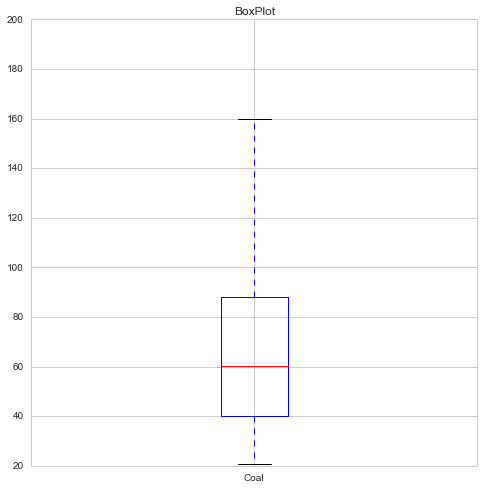

In [79]:
plt.show(coal['Coal'].plot(kind='box',figsize=(8,8),title=('BoxPlot'))) 
#both coal and BDI had no apparent outliers, but both have long tails

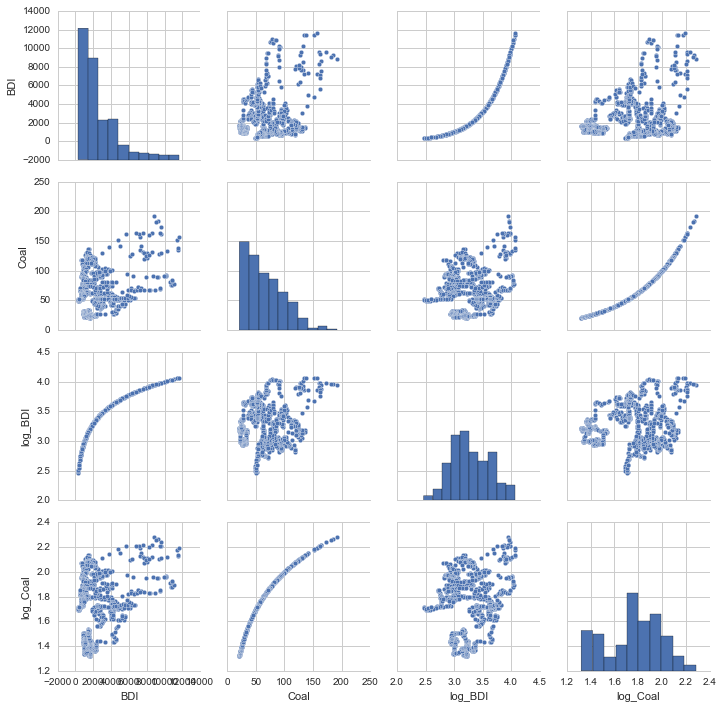

In [80]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(coal, size=2.5);
plt.show() #both have large positive skew so in excel I will take log10 to make more normal

In [81]:
from datetime import datetime
coalnew['Date'] = pd.to_datetime(coalnew['Date'])
date = coalnew['Date']
coalnew.dtypes

Date        datetime64[ns]
BDI                 object
Coal                object
log_BDI             object
log_Coal            object
dtype: object

In [87]:
coalnew

,Date,BDI,Coal,log_BDI,log_Coal
0,2000-02-18,1454,21.3,3.16256,1.32838
1,2000-02-25,1511,21.3,3.17926,1.32838
2,2000-03-03,1578,20.9,3.19811,1.32015
3,2000-03-10,1645,21,3.21617,1.32222
4,2000-03-17,1630,21,3.21219,1.32222
5,2000-03-24,1618,21,3.20898,1.32222
6,2000-03-31,1660,21,3.22011,1.32222
7,2000-04-07,1684,21.2,3.22634,1.32634
8,2000-04-14,1676,21.4,3.22427,1.33041
9,2000-04-21,1656,21.5,3.21906,1.33244


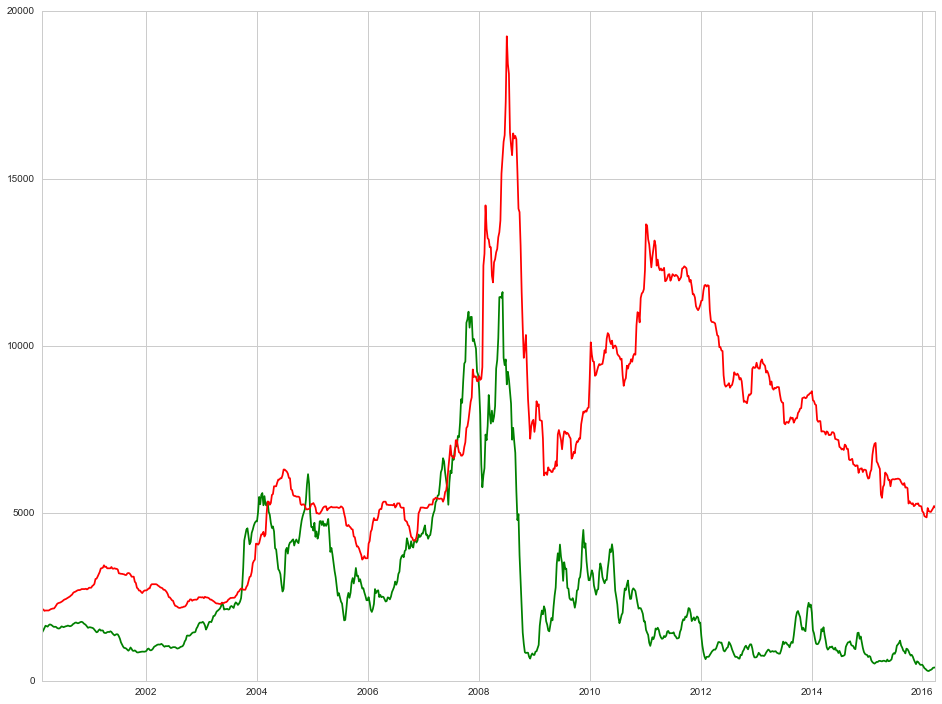

In [50]:
#trend, looks like BDI is leading coal
x = date
y1 = (coalnew['BDI'])
y2 = (coalnew['Coal'])*100

plt.figure(figsize=(16,12))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')
plt.show()

In [82]:
#fit a OLS model with intercept on BDI to predict freight
#really bad R^2 so terrible model
X = coal[['BDI']]
Y = coal[['Coal']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Coal   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     59.03
Date:                Thu, 24 Mar 2016   Prob (F-statistic):           4.32e-14
Time:                        09:12:19   Log-Likelihood:                -4115.9
No. Observations:                 841   AIC:                             8236.
Df Residuals:                     839   BIC:                             8245.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         56.0453      1.727     32.453      0.000        52.656    59.435
BDI            0.0039      0.001      7.683      0.000         0.003     0.005
==============================================================================
Omnibus:                       72.908   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.184
Skew:                           0.594   Prob(JB):                     1.90e-14
Kurtosis:                       2.374   Cond. No.                     5.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


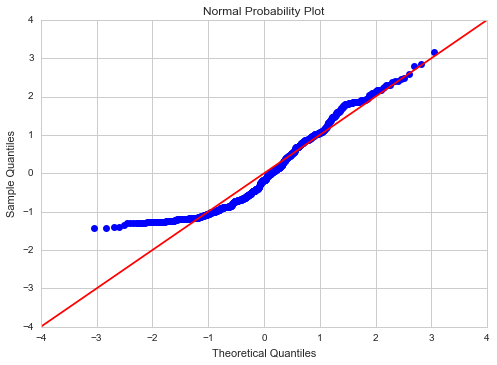

In [52]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()
#apparent skew

In [83]:
X = coalmore[['log_BDI']]
Y = coalmore[['log_Coal']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()
#made the R^2 even worse

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_Coal   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     15.51
Date:                Thu, 24 Mar 2016   Prob (F-statistic):           8.89e-05
Time:                        09:12:31   Log-Likelihood:                 40.789
No. Observations:                 841   AIC:                            -77.58
Df Residuals:                     839   BIC:                            -68.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.4488      0.080     18.120      0.000         1.292     1.606
log_BDI        0.0953      0.024      3.938      0.000         0.048     0.143
==============================================================================
Omnibus:                      225.638   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.845
Skew:                          -0.222   Prob(JB):                     1.83e-10
Kurtosis:                       1.960   Cond. No.                         36.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


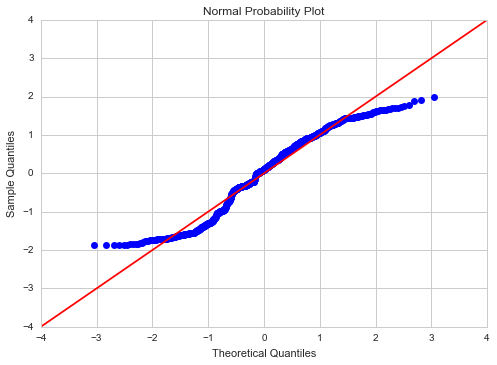

In [54]:
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()

### Now using RDF model

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = coalnew[['BDI']].values
y = coalnew['Coal'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [85]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [62]:
#do multiple times to see what parameters are the best
rdf_model_coal = fit_predict_model(X_train,y_train)
print (rdf_model_coal.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [86]:
X = coalnew[['BDI']].values
y = coalnew['Coal'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 558.809, test: 868.692
R^2 train: 0.514, test: 0.166


### RDF vs LR vs Transformed Model

In [88]:
coal_predicted = forest.predict(X)
coal_predicted = pd.DataFrame(coal_predicted)
coalnew['Predicted_Coal_RDF'] = coal_predicted
rdf_error = (abs(coalnew['Predicted_Coal_RDF'] - coalnew['Coal'])/coalnew['Coal'])*100
coalnew['RDF_Error'] = rdf_error
lr_predicted = 56.0453 + (coalnew['BDI']*0.0039)
coalnew['Predicted_Coal_LR'] = lr_predicted
lr_error = (abs(coalnew['Predicted_Coal_LR'] - coalnew['Coal'])/coalnew['Coal'])*100
coalnew['LR_Error'] = lr_error
predicted_transform = 10**(1.4488 + (coalnew['log_BDI']*0.0953))
coalnew['Predicted_Coal_Trans'] = predicted_transform
trans_error = (abs(coalnew['Predicted_Coal_Trans'] - coalnew['Coal'])/coalnew['Coal'])*100
coalnew['Trans_Error'] = trans_error

print("Average RDF error is: %.3f" % (rdf_error.mean())) #this model looks worse than 
print("Average LR error is: %.3f" % (lr_error.mean()))
print("Average Trans error is: %.3f" % (trans_error.mean()))
coalnew

Average RDF error is: 40.066
Average LR error is: 56.119
Average Trans error is: 49.804


,Date,BDI,Coal,log_BDI,log_Coal,Predicted_Coal_RDF,RDF_Error,Predicted_Coal_LR,LR_Error,Predicted_Coal_Trans,Trans_Error
0,2000-02-18,1454,21.3,3.16256,1.32838,46.098338,116.424,61.7159,189.746,56.259,164.127
1,2000-02-25,1511,21.3,3.17926,1.32838,66.147093,210.55,61.9382,190.79,56.4656,165.097
2,2000-03-03,1578,20.9,3.19811,1.32015,37.604565,79.9261,62.1995,197.605,56.6995,171.29
3,2000-03-10,1645,21,3.21617,1.32222,44.260289,110.763,62.4608,197.432,56.9247,171.07
4,2000-03-17,1630,21,3.21219,1.32222,25.708649,22.4221,62.4023,197.154,56.875,170.833
5,2000-03-24,1618,21,3.20898,1.32222,25.642726,22.1082,62.3555,196.931,56.835,170.643
6,2000-03-31,1660,21,3.22011,1.32222,30.753675,46.4461,62.5193,197.711,56.9739,171.305
7,2000-04-07,1684,21.2,3.22634,1.32634,35.889896,69.292,62.6129,195.344,57.0519,169.113
8,2000-04-14,1676,21.4,3.22427,1.33041,41.489710,93.8772,62.5817,192.438,57.0261,166.477
9,2000-04-21,1656,21.5,3.21906,1.33244,30.731229,42.936,62.5037,190.715,56.9608,164.934


In [90]:
newpred2 = data [['Date','BDI','log_BDI']][0:215]
newpred = data [['BDI']][0:215]
newpred2.tail()

,Date,BDI,log_BDI
210,1/14/2000,1404,3.147367
211,1/21/2000,1384,3.141136
212,1/28/2000,1329,3.123525
213,2/4/2000,1280,3.107210
214,2/11/2000,1345,3.128722


In [91]:
#new predictions
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date', 'BDI','log_BDI']
lr_predictednew = 56.0453 + (newpred2['BDI']*0.0039)
newpred2['Predicted_Coal_LR'] = lr_predictednew
trans_predictednew = 10**(1.4488 + (newpred2['log_BDI']*0.0953))
newpred2['Predicted_Coal_Trans'] = trans_predictednew
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Predicted_Coal_RDF'] = df_new_pred
newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

,Date,BDI,log_BDI,Predicted_Coal_LR,Predicted_Coal_Trans,Predicted_Coal_RDF
0,1996-01-05,1583,3.19948,62.219,56.7166,36.439219
1,1996-01-12,1550,3.19033,62.0903,56.6029,61.145967
2,1996-01-19,1538,3.18696,62.0435,56.561,64.461062
3,1996-01-26,1529,3.18441,62.0084,56.5294,83.401402
4,1996-02-02,1484,3.17143,61.8329,56.3687,71.722297
5,1996-02-09,1453,3.16227,61.712,56.2554,46.098338
6,1996-02-16,1437,3.15746,61.6496,56.196,58.580804
7,1996-02-23,1400,3.14613,61.5053,56.0565,52.665997
8,1996-03-01,1357,3.13258,61.3376,55.8901,57.258321
9,1996-03-08,1350,3.13033,61.3103,55.8626,80.353001


In [93]:
frames = [newpred2,coalnew]
combined = pd.concat(frames)
combined

,BDI,Coal,Date,LR_Error,Predicted_Coal_LR,Predicted_Coal_RDF,Predicted_Coal_Trans,RDF_Error,Trans_Error,log_BDI,log_Coal
0,1583,NaN,1996-01-05,NaN,62.219,36.439219,56.7166,NaN,NaN,3.19948,NaN
1,1550,NaN,1996-01-12,NaN,62.0903,61.145967,56.6029,NaN,NaN,3.19033,NaN
2,1538,NaN,1996-01-19,NaN,62.0435,64.461062,56.561,NaN,NaN,3.18696,NaN
3,1529,NaN,1996-01-26,NaN,62.0084,83.401402,56.5294,NaN,NaN,3.18441,NaN
4,1484,NaN,1996-02-02,NaN,61.8329,71.722297,56.3687,NaN,NaN,3.17143,NaN
5,1453,NaN,1996-02-09,NaN,61.712,46.098338,56.2554,NaN,NaN,3.16227,NaN
6,1437,NaN,1996-02-16,NaN,61.6496,58.580804,56.196,NaN,NaN,3.15746,NaN
7,1400,NaN,1996-02-23,NaN,61.5053,52.665997,56.0565,NaN,NaN,3.14613,NaN
8,1357,NaN,1996-03-01,NaN,61.3376,57.258321,55.8901,NaN,NaN,3.13258,NaN
9,1350,NaN,1996-03-08,NaN,61.3103,80.353001,55.8626,NaN,NaN,3.13033,NaN


In [94]:
combined.to_csv("C:/Users/msteinme/Documents/coal2.csv")

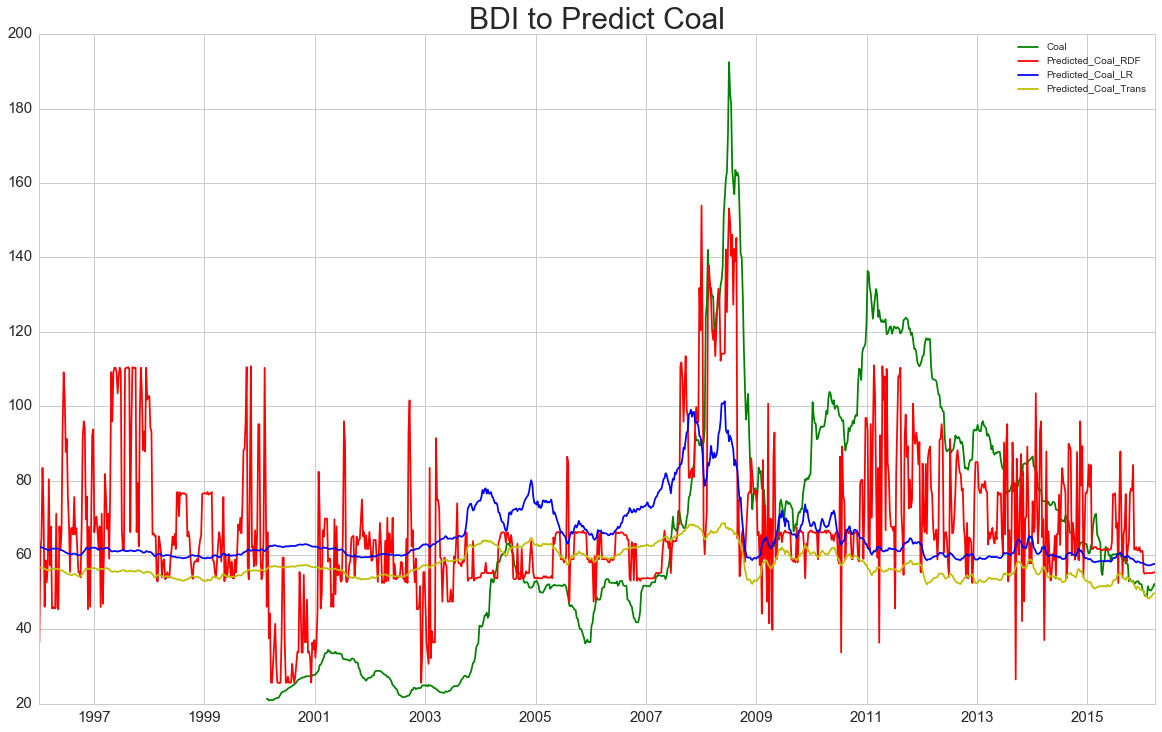

In [95]:
#can clearly see that BDI isn't very good at predicting coal values
x = (combined['Date'])
y1 = (combined['Coal'])
y2 = (combined['Predicted_Coal_RDF'])
y3 = (combined['Predicted_Coal_LR'])
y4 = (combined['Predicted_Coal_Trans'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'r')
ax.plot(x,y3,'b')
ax.plot(x,y4,'y')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('BDI to Predict Coal', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show()

# BDI leading coal by x days
[Top](#Table-of-Contents)

In [123]:
coallead = data[['Date','Coal','BDI_Lead']]
coallead = coallead.dropna()
print(coallead.shape)
coalleadnew = np.array(coallead)
coalleadnew = pd.DataFrame(coalleadnew)
coalleadnew.columns = ['Date','Coal','BDI_Lead']
coalleadnew

(841, 3)


,Date,Coal,BDI_Lead
0,2/18/2000,21.3,1404
1,2/25/2000,21.3,1351
2,3/3/2000,20.9,1296
3,3/10/2000,21,1335
4,3/17/2000,21,1354
5,3/24/2000,21,1355
6,3/31/2000,21,1341
7,4/7/2000,21.2,1360
8,4/14/2000,21.4,1343
9,4/21/2000,21.5,1319


In [118]:
coallead.corr()

,Coal,BDI_Lead
Coal,1.000000,0.389071
BDI_Lead,0.389071,1.000000


In [124]:
from datetime import datetime
coalleadnew['Date'] = pd.to_datetime(coalleadnew['Date'])
date = coalleadnew['Date']
coalleadnew.dtypes

Date        datetime64[ns]
Coal                object
BDI_Lead            object
dtype: object

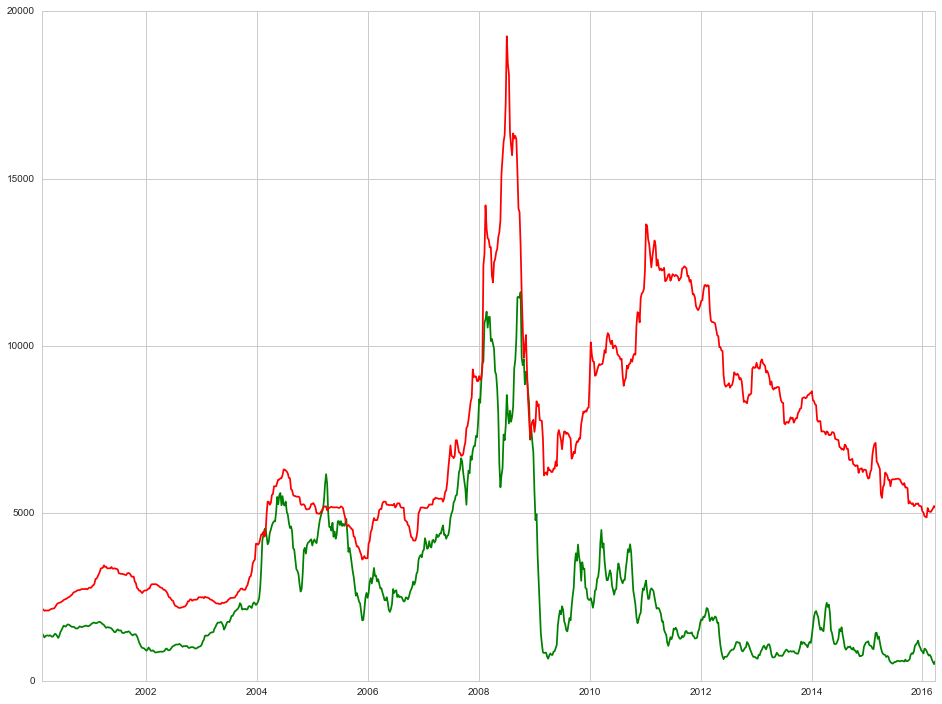

In [120]:
x = date
y1 = (coalleadnew['BDI_Lead'])
y2 = (coalleadnew['Coal'])*100

plt.figure(figsize=(16,12))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')
plt.show()

In [121]:
#still not good
X = coallead[['BDI_Lead']]
Y = coallead[['Coal']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Coal   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     149.7
Date:                Thu, 24 Mar 2016   Prob (F-statistic):           8.77e-32
Time:                        10:00:22   Log-Likelihood:                -4075.5
No. Observations:                 841   AIC:                             8155.
Df Residuals:                     839   BIC:                             8165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         50.5811      1.660     30.475      0.000        47.323    53.839
BDI_Lead       0.0060      0.000     12.234      0.000         0.005     0.007
==============================================================================
Omnibus:                       89.947   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.116
Skew:                           0.626   Prob(JB):                     2.19e-16
Kurtosis:                       2.300   Cond. No.                     5.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
lr_predicted = 50.5811 + (coalleadnew['BDI_Lead']*0.0060)
coalleadnew['Predicted_Coal_LR'] = lr_predicted
lr_error = (abs(coalleadnew['Predicted_Coal_LR'] - coalleadnew['Coal'])/coalleadnew['Coal'])*100
coalleadnew['LR_Error'] = lr_error
print("Average LR error is: %.3f" % (lr_error.mean()))
coalleadnew
#bad so not going any further in investigating this model

Average LR error is: 53.717


,Date,Coal,BDI_Lead,Predicted_Coal_LR,LR_Error
0,2000-02-18,21.3,1404,59.0051,177.019
1,2000-02-25,21.3,1351,58.6871,175.526
2,2000-03-03,20.9,1296,58.3571,179.221
3,2000-03-10,21,1335,58.5911,179.005
4,2000-03-17,21,1354,58.7051,179.548
5,2000-03-24,21,1355,58.7111,179.577
6,2000-03-31,21,1341,58.6271,179.177
7,2000-04-07,21.2,1360,58.7411,177.081
8,2000-04-14,21.4,1343,58.6391,174.014
9,2000-04-21,21.5,1319,58.4951,172.07


# BDI and freight to predict coal 
[Top](#Table-of-Contents)

In [127]:
coalall = data[['Date','BDI','Coal','Freight']]
coalall = coalall.dropna()
print(coalall.shape)
coalallnew = np.array(coalall)
coalallnew = pd.DataFrame(coalallnew)
coalallnew.columns = ['Date','BDI','Coal','Freight']
coalallnew

(791, 4)


,Date,BDI,Coal,Freight
0,2/18/2000,1454,21.3,7.5
1,2/25/2000,1511,21.3,7.5
2,3/3/2000,1578,20.9,7.75
3,3/10/2000,1645,21,7.85
4,3/17/2000,1630,21,7.85
5,3/24/2000,1618,21,7.85
6,3/31/2000,1660,21,7.85
7,4/7/2000,1684,21.2,7.95
8,4/14/2000,1676,21.4,8.1
9,4/21/2000,1656,21.5,8.1


In [42]:
coalall.corr()

,BDI,Coal,Freight
BDI,1.000000,0.245014,0.952179
Coal,0.245014,1.000000,0.411525
Freight,0.952179,0.411525,1.000000


In [ ]:
#since BDI and freight are highly correlated to each other in LR model using Freight as x variable since higher
#correlation to coal, however I will use both in RDF model

In [128]:
from datetime import datetime
coalallnew['Date'] = pd.to_datetime(coalallnew['Date'])
date = coalallnew['Date']
coalallnew.dtypes

Date       datetime64[ns]
BDI                object
Coal               object
Freight            object
dtype: object

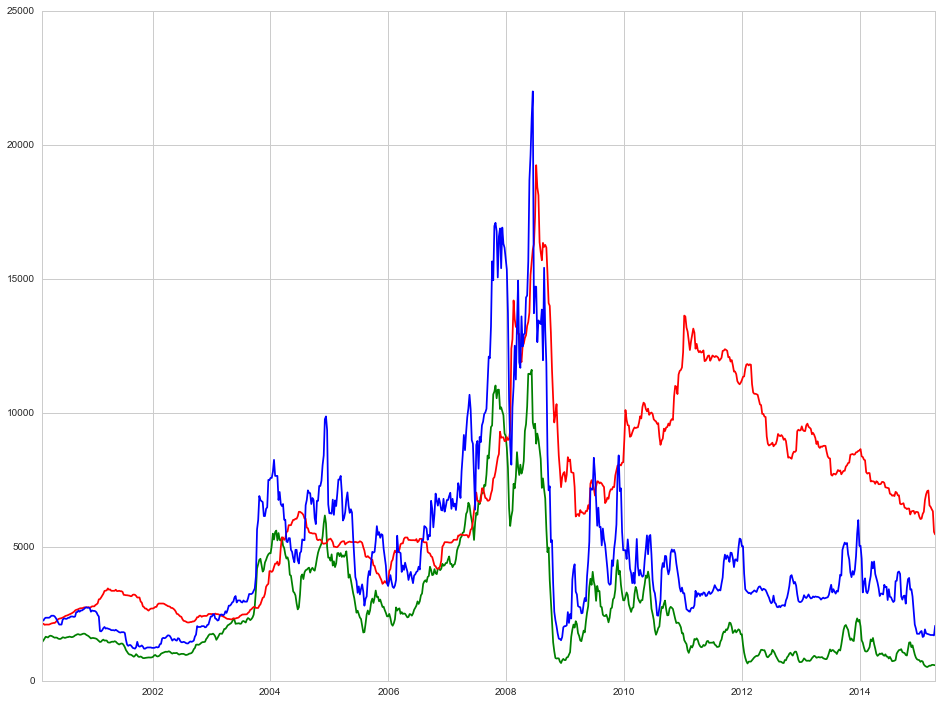

In [131]:
x = date
y1 = (coalallnew['BDI'])
y2 = (coalallnew['Coal'])*100
y3 = (coalallnew['Freight'])*300

plt.figure(figsize=(16,12))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')
plt.plot(x,y3,'b')
plt.show()

In [132]:
X = coalall[['BDI','Freight']]
Y = coalall[['Coal']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Coal   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     263.0
Date:                Thu, 24 Mar 2016   Prob (F-statistic):           3.22e-88
Time:                        10:16:56   Log-Likelihood:                -3717.2
No. Observations:                 791   AIC:                             7440.
Df Residuals:                     788   BIC:                             7454.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         39.9183      1.695     23.550      0.000        36.591    43.246
BDI           -0.0244      0.001    -17.420      0.000        -0.027    -0.022
Freight        6.0417      0.286     21.145      0.000         5.481     6.603
==============================================================================
Omnibus:                       87.641   Durbin-Watson:                   0.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.946
Skew:                           0.890   Prob(JB):                     1.10e-25
Kurtosis:                       3.566   Cond. No.                     6.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
X = coalall[['Freight']]
Y = coalall[['Coal']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Coal   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     160.9
Date:                Thu, 24 Mar 2016   Prob (F-statistic):           1.11e-33
Time:                        10:19:08   Log-Likelihood:                -3846.0
No. Observations:                 791   AIC:                             7696.
Df Residuals:                     789   BIC:                             7705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         46.7040      1.940     24.071      0.000        42.895    50.513
Freight        1.3023      0.103     12.683      0.000         1.101     1.504
==============================================================================
Omnibus:                      113.805   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.690
Skew:                           0.575   Prob(JB):                     3.30e-15
Kurtosis:                       2.164   Cond. No.                         33.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = coalallnew[['BDI','Freight']].values
y = coalallnew['Coal'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [137]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [143]:
rdf_model_coalall = fit_predict_model(X_train,y_train)
print (rdf_model_coalall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [146]:
X = coalallnew[['BDI','Freight']].values
y = coalallnew['Coal'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 197.601, test: 327.994
R^2 train: 0.831, test: 0.725
[ 0.40543452  0.59456548]


In [148]:
coal_predicted = forest.predict(X)
coal_predicted = pd.DataFrame(coal_predicted)
coalallnew['Predicted_CoalAll_RDF'] = coal_predicted
rdf_error = (abs(coalallnew['Predicted_CoalAll_RDF'] - coalallnew['Coal'])/coalallnew['Coal'])*100
coalallnew['RDF_Error'] = rdf_error
mlr_predicted = 39.183 - (coalallnew['BDI']*0.0244) + (coalallnew['Freight']*6.0417)
coalallnew['Predicted_Coal_MLR'] = mlr_predicted
mlr_error = (abs(coalallnew['Predicted_Coal_MLR'] - coalallnew['Coal'])/coalallnew['Coal'])*100
coalallnew['MLR_Error'] = mlr_error
lr_predicted = 46.7040 + (coalallnew['Freight']*1.3023)
coalallnew['Predicted_Coal_LR'] = lr_predicted
lr_error = (abs(coalallnew['Predicted_Coal_LR'] - coalallnew['Coal'])/coalallnew['Coal'])*100
coalallnew['LR_Error'] = lr_error

print("Average RDF error is: %.3f" % (rdf_error.mean())) #this model looks worse than 
print("Average LR error is: %.3f" % (lr_error.mean()))
print("Average MLR error is: %.3f" % (mlr_error.mean()))
coalallnew

Average RDF error is: 17.652
Average LR error is: 54.217
Average MLR error is: 38.846


,Date,BDI,Coal,Freight,Predicted_CoalAll_RDF,RDF_Error,Predicted_Coal_MLR,MLR_Error,Predicted_Coal_LR,LR_Error
0,2000-02-18,1454,21.3,7.5,35.381955,66.1125,49.0181,130.132,56.4712,165.123
1,2000-02-25,1511,21.3,7.5,29.583807,38.8911,47.6273,123.603,56.4712,165.123
2,2000-03-03,1578,20.9,7.75,26.582018,27.1867,47.503,127.287,56.7968,171.755
3,2000-03-10,1645,21,7.85,31.669234,50.8059,46.4723,121.297,56.9271,171.081
4,2000-03-17,1630,21,7.85,22.713675,8.16036,46.8383,123.04,56.9271,171.081
5,2000-03-24,1618,21,7.85,22.499421,7.1401,47.1311,124.434,56.9271,171.081
6,2000-03-31,1660,21,7.85,23.555337,12.1683,46.1063,119.554,56.9271,171.081
7,2000-04-07,1684,21.2,7.95,24.102712,13.692,46.1249,117.57,57.0573,169.138
8,2000-04-14,1676,21.4,8.1,26.479772,23.7373,47.2264,120.684,57.2526,167.536
9,2000-04-21,1656,21.5,8.1,26.136580,21.5655,47.7144,121.927,57.2526,166.291


In [149]:
newpred2 = data [['Date','BDI','Freight']][0:215]
newpred = data [['BDI','Freight']][0:215]
newpred2.tail()

,Date,BDI,Freight
210,1/14/2000,1404,6.90
211,1/21/2000,1384,6.75
212,1/28/2000,1329,6.65
213,2/4/2000,1280,6.45
214,2/11/2000,1345,6.40


In [150]:
#new predictions
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date', 'BDI','Freight']
lr_predictednew =  46.7040 + (newpred2['Freight']*1.3023)
newpred2['Predicted_Coal_LR'] = lr_predictednew
mlr_predictednew = 39.183 - (newpred2['BDI']*0.0244) + (newpred2['Freight']*6.0417)
newpred2['Predicted_Coal_MLR'] = mlr_predictednew
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Predicted_CoalAll_RDF'] = df_new_pred
newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

,Date,BDI,Freight,Predicted_Coal_LR,Predicted_Coal_MLR,Predicted_CoalAll_RDF
0,1996-01-05,1583,4.15,52.1085,25.6309,27.920659
1,1996-01-12,1550,4.55,52.6295,28.8527,28.021473
2,1996-01-19,1538,4.55,52.6295,29.1455,28.513564
3,1996-01-26,1529,4.55,52.6295,29.3651,28.699371
4,1996-02-02,1484,4.6,52.6946,30.7652,28.921025
5,1996-02-09,1453,4.6,52.6946,31.5216,28.836267
6,1996-02-16,1437,4.15,52.1085,29.1933,29.041840
7,1996-02-23,1400,4.25,52.2388,30.7002,29.033847
8,1996-03-01,1357,4.35,52.369,32.3536,28.547701
9,1996-03-08,1350,5.5,53.8666,39.4723,27.517490


In [151]:
frames = [newpred2,coalallnew]
combined = pd.concat(frames)
combined

,BDI,Coal,Date,Freight,LR_Error,MLR_Error,Predicted_CoalAll_RDF,Predicted_Coal_LR,Predicted_Coal_MLR,RDF_Error
0,1583,NaN,1996-01-05,4.15,NaN,NaN,27.920659,52.1085,25.6309,NaN
1,1550,NaN,1996-01-12,4.55,NaN,NaN,28.021473,52.6295,28.8527,NaN
2,1538,NaN,1996-01-19,4.55,NaN,NaN,28.513564,52.6295,29.1455,NaN
3,1529,NaN,1996-01-26,4.55,NaN,NaN,28.699371,52.6295,29.3651,NaN
4,1484,NaN,1996-02-02,4.6,NaN,NaN,28.921025,52.6946,30.7652,NaN
5,1453,NaN,1996-02-09,4.6,NaN,NaN,28.836267,52.6946,31.5216,NaN
6,1437,NaN,1996-02-16,4.15,NaN,NaN,29.041840,52.1085,29.1933,NaN
7,1400,NaN,1996-02-23,4.25,NaN,NaN,29.033847,52.2388,30.7002,NaN
8,1357,NaN,1996-03-01,4.35,NaN,NaN,28.547701,52.369,32.3536,NaN
9,1350,NaN,1996-03-08,5.5,NaN,NaN,27.517490,53.8666,39.4723,NaN


In [152]:
combined.to_csv("C:/Users/msteinme/Documents/coalall.csv")

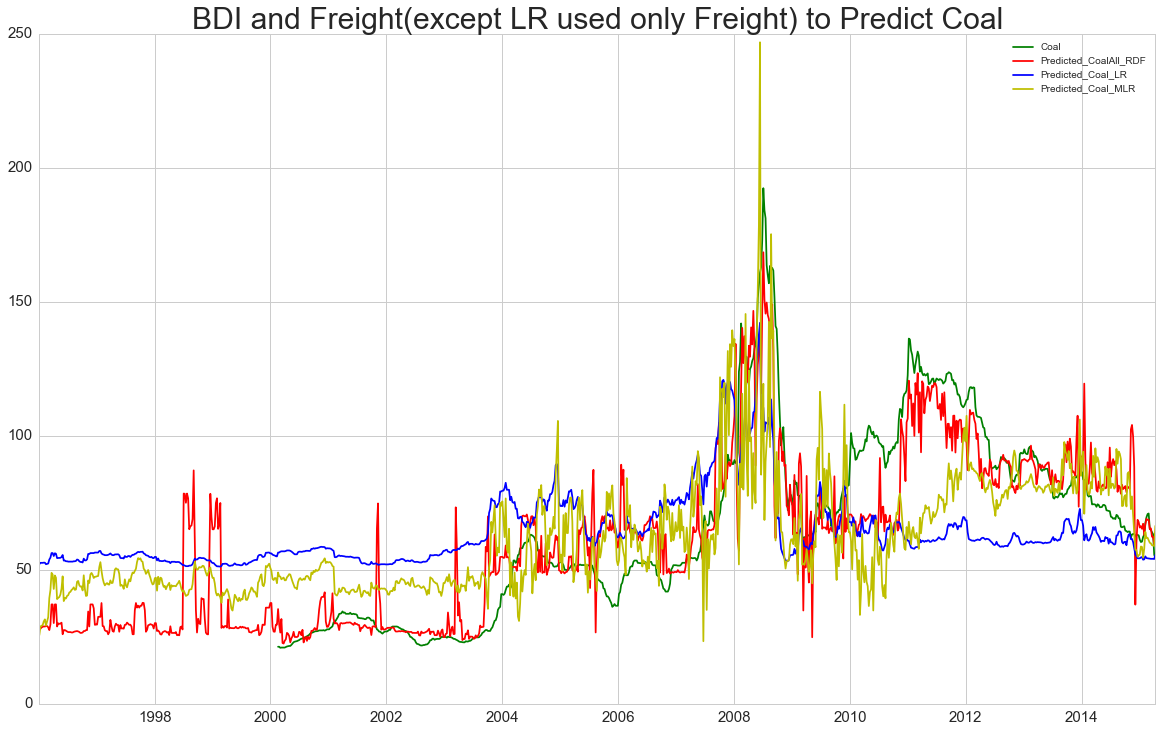

In [153]:
x = (combined['Date'])
y1 = (combined['Coal'])
y2 = (combined['Predicted_CoalAll_RDF'])
y3 = (combined['Predicted_Coal_LR'])
y4 = (combined['Predicted_Coal_MLR'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'r')
ax.plot(x,y3,'b')
ax.plot(x,y4,'y')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('BDI and Freight(except LR used only Freight) to Predict Coal', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show()

# Other Ideas I thought of
[Top](#Table-of-Contents)

## In predicting freight using BDI all of the models were really bad at predicting 1996 so I have decided to do the same analysis, but without 1996 since we want to predict forward anyways

In [79]:
freight_no96 = freight[52:]
freightnew_no96 = np.array(freight_no96)
freightnew_no96 = pd.DataFrame(freightnew_no96)
freightnew_no96.columns = ['Date','BDI','Freight']
freightnew_no96.head()

,Date,BDI,Freight
0,1/3/1997,1511,7.5
1,1/10/1997,1507,7.5
2,1/17/1997,1483,7.95
3,1/24/1997,1407,7.95
4,1/31/1997,1367,7.25


In [7]:
freight_no96.describe()

,BDI,Freight
count,954.000000,954.00000
mean,2450.072327,13.78196
std,2102.953811,10.57549
min,513.000000,3.50000
25%,1037.000000,6.75000
50%,1582.000000,10.80000
75%,3012.000000,16.70000
max,11612.000000,73.35000


In [8]:
freight_no96.corr()

,BDI,Freight
BDI,1.000000,0.954444
Freight,0.954444,1.000000


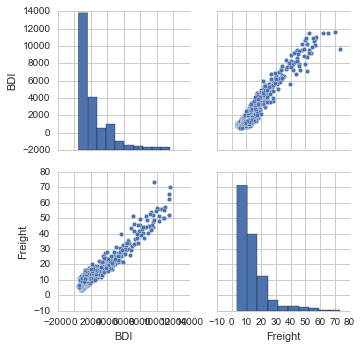

In [9]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
sns.pairplot(freight_no96, size=2.5);
plt.show()
#it's skewed but last time when I took log10 made more normal 
#however models ability in predicting was worse than just LR

In [80]:
from datetime import datetime
freightnew_no96['Date'] = pd.to_datetime(freightnew_no96['Date'])
date = freightnew_no96['Date']
freightnew_no96.dtypes

Date       datetime64[ns]
BDI                object
Freight            object
dtype: object

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with intercept on BDI to predict freight
X = freight_no96[['BDI']]
Y = freight_no96[['Freight']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Freight   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     9740.
Date:                Fri, 25 Mar 2016   Prob (F-statistic):               0.00
Time:                        08:10:30   Log-Likelihood:                -2449.5
No. Observations:                 954   AIC:                             4903.
Df Residuals:                     952   BIC:                             4913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0222      0.157     12.880      0.000         1.714     2.330
BDI            0.0048   4.86e-05     98.693      0.000         0.005     0.005
==============================================================================
Omnibus:                      255.614   Durbin-Watson:                   0.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              939.183
Skew:                           1.245   Prob(JB):                    1.15e-204
Kurtosis:                       7.174   Cond. No.                     4.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


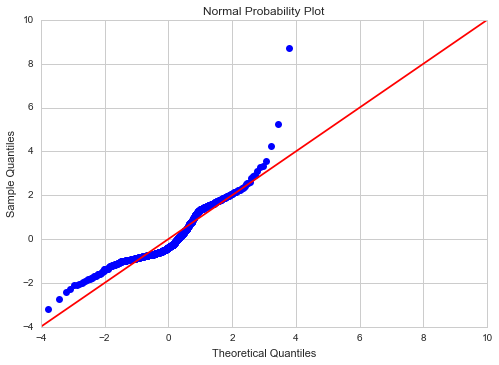

In [12]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()
#this round of analysis I am going to get rid of a few apparent influential outliers

In [13]:
infl=est.get_influence()
print (infl.summary_table()) #outliers = 595,596,597

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0      7.500      9.275      0.000     -0.562      0.001     -0.020     -0.562     -0.020
         1      7.500      9.255      0.000     -0.556      0.001     -0.020     -0.556     -0.020
         2      7.950      9.140      0.000     -0.377      0.001     -0.013     -0.377     -0.013
         3      7.950      8.775      0.000     -0.262      0.001     -0.009     -0.261     -0.009
         4      7.250      8.583      0.000     -0.423      0.001     -0.015     -0.422     -0.015
         5      7.000      8.814      0.000     -0.575      0.001     -0.021     -0.575     -0.021
         6      6.900      9.030      0.000     -0.675      0.001     -0.024     -0.675     -0.024
         7

In [82]:
freight_out = freight_no96.drop([647,648,649])
#freight_out[570:]
freight_outnew = np.array(freight_out)
freight_outnew = pd.DataFrame(freight_outnew)
freight_outnew.columns = ['Date','BDI','Freight']
freight_outnew.tail()

,Date,BDI,Freight
946,3/13/2015,562,5.7
947,3/20/2015,591,5.7
948,3/27/2015,596,5.7
949,4/3/2015,588,5.65
950,4/10/2015,580,6.85


In [70]:
#also have to drop outliers in freightnew_no96 otherwise when want to compare models they won't line up because one
#would have more observations
#freightnew_no96 = freightnew_no96.drop([595,596,597])
#freightnew_no96[570:]

In [83]:
freight_outnew['Date'] = pd.to_datetime(freight_outnew['Date'])
date = freight_outnew['Date']
freight_outnew.dtypes

Date       datetime64[ns]
BDI                object
Freight            object
dtype: object

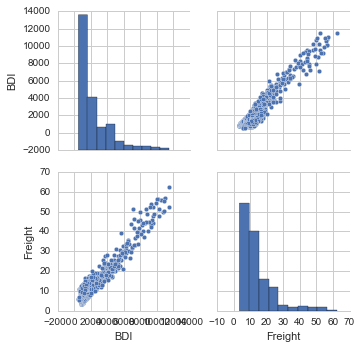

In [43]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(freight_out, size=2.5);
plt.show()

In [44]:
#now without outliers, see if any different
X = freight_out[['BDI']]
Y = freight_out[['Freight']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Freight   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     9768.
Date:                Fri, 25 Mar 2016   Prob (F-statistic):               0.00
Time:                        08:41:48   Log-Likelihood:                -2396.8
No. Observations:                 951   AIC:                             4798.
Df Residuals:                     949   BIC:                             4807.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.1981      0.151     14.539      0.000         1.901     2.495
BDI            0.0047   4.76e-05     98.834      0.000         0.005     0.005
==============================================================================
Omnibus:                       93.603   Durbin-Watson:                   0.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.579
Skew:                           0.838   Prob(JB):                     1.08e-26
Kurtosis:                       3.455   Cond. No.                     4.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


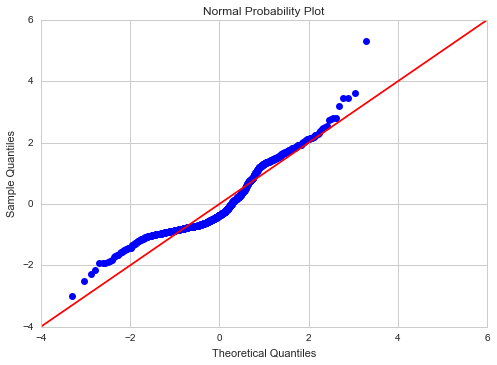

In [45]:
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()

### Try RDF now

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X=freightnew_no96[['BDI']].values
y=freightnew_no96['Freight'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [50]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [53]:
#do multiple times to see what parameters are the best
rdf_model_freightout = fit_predict_model(X_train,y_train)
print (rdf_model_freightout.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [84]:
X=freightnew_no96[['BDI']].values
y=freightnew_no96['Freight'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 5.840, test: 10.348
R^2 train: 0.953, test: 0.877


### Summary of RDF model vs LR

In [85]:
#can't get to line up properly so I will do LR part in excel
#please disregard Predicted_freight_lr and LR_Error, look at Excel sheet instead
freightno96_predicted = forest.predict(X)
freightno96_predicted = pd.DataFrame(freightno96_predicted)
freightno96_predicted.columns = ['Predicted_Freight_RDF']
freightnew_no96['Predicted_Freight_RDF'] = freightno96_predicted
rdf_error = (abs(freightnew_no96['Predicted_Freight_RDF'] - freightnew_no96['Freight'])/freightnew_no96['Freight'])*100
freightnew_no96['RDF_Error'] = rdf_error
lr_predicted_no96 = 2.1981 + (freight_outnew['BDI']*0.0047)
freightnew_no96['Predicted_Freight_LR'] = lr_predicted_no96
lr_error = (abs(freightnew_no96['Predicted_Freight_LR'] - freightnew_no96['Freight'])/freightnew_no96['Freight'])*100
freightnew_no96['LR_Error'] = lr_error

print("Average RDF error is: %.3f" % (rdf_error.mean())) #this model looks worse than 
print("Average LR error is: %.3f" % (lr_error.mean()))
freightnew_no96

Average RDF error is: 22.085
Average LR error is: 26.852


,Date,BDI,Freight,Predicted_Freight_RDF,RDF_Error,Predicted_Freight_LR,LR_Error
0,1997-01-03,1511,7.5,8.478542,13.0472,9.2998,23.9973
1,1997-01-10,1507,7.5,8.426465,12.3529,9.281,23.7467
2,1997-01-17,1483,7.95,8.356633,5.11488,9.1682,15.3233
3,1997-01-24,1407,7.95,8.041681,1.15322,8.811,10.8302
4,1997-01-31,1367,7.25,8.035775,10.8383,8.623,18.9379
5,1997-02-07,1415,7,8.101849,15.7407,8.8486,26.4086
6,1997-02-14,1460,6.9,8.172701,18.4449,9.0601,31.3058
7,1997-02-21,1465,6.75,8.248571,22.2011,9.0836,34.5719
8,1997-02-28,1443,6.75,8.172701,21.077,8.9802,33.04
9,1997-03-07,1430,6.75,8.136289,20.5376,8.9191,32.1348


In [93]:
newpred2 = data [['Date','BDI']][1006:1056]
newpred = data [['BDI']][1006:1056]
newpred2.tail()

,Date,BDI
1051,2/26/2016,327
1052,3/4/2016,349
1053,3/11/2016,388
1054,3/18/2016,395
1055,3/25/2016,398


In [94]:
#new predictions
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date', 'BDI']
lr_predictednew = 2.1981 + (newpred2['BDI']*0.0047)
newpred2['Predicted_Freight_LR'] = lr_predictednew
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Predicted_Freight_RDF'] = df_new_pred
newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

,Date,BDI,Predicted_Freight_LR,Predicted_Freight_RDF
0,2015-04-17,597,5.004,8.007647
1,2015-04-24,600,5.0181,8.007647
2,2015-05-01,587,4.957,8.007647
3,2015-05-08,574,4.8959,8.007647
4,2015-05-15,634,5.1779,8.029541
5,2015-05-22,586,4.9523,8.007647
6,2015-05-29,589,4.9664,8.007647
7,2015-06-05,610,5.0651,8.007647
8,2015-06-12,642,5.2155,8.029541
9,2015-06-19,779,5.8594,8.055734


In [95]:
frames = [freightnew_no96,newpred2]
combined = pd.concat(frames)
combined


,BDI,Date,Freight,LR_Error,Predicted_Freight_LR,Predicted_Freight_RDF,RDF_Error
0,1511,1997-01-03,7.5,23.9973,9.2998,8.478542,13.0472
1,1507,1997-01-10,7.5,23.7467,9.281,8.426465,12.3529
2,1483,1997-01-17,7.95,15.3233,9.1682,8.356633,5.11488
3,1407,1997-01-24,7.95,10.8302,8.811,8.041681,1.15322
4,1367,1997-01-31,7.25,18.9379,8.623,8.035775,10.8383
5,1415,1997-02-07,7,26.4086,8.8486,8.101849,15.7407
6,1460,1997-02-14,6.9,31.3058,9.0601,8.172701,18.4449
7,1465,1997-02-21,6.75,34.5719,9.0836,8.248571,22.2011
8,1443,1997-02-28,6.75,33.04,8.9802,8.172701,21.077
9,1430,1997-03-07,6.75,32.1348,8.9191,8.136289,20.5376


In [96]:
combined.to_csv("C:/Users/msteinme/Documents/freightno96.csv")

## In predicting coal with just BDI since we are back predicting and the models weren't the greatest earlier on in time I am going to make a model from 2/18/2000 - 2/27/2004
[Top](#Table-of-Contents)

In [13]:
#since the transformed model seemed promising in the coal case I am going to keep log10BDI and 
#log10coal
coal_early = data[['Date','BDI','Coal','log_BDI','log_Coal']]
coal_early2 = coal_early.dropna()
coal_early2 = coal_early2[0:211]
coal_early2new = np.array(coal_early2)
coal_early2new = pd.DataFrame(coal_early2new)
coal_early2new.columns = ['Date','BDI','Coal','log_BDI','log_Coal']
coal_early2new.tail()

,Date,BDI,Coal,log_BDI,log_Coal
206,1/30/2004,5551,43.75,3.74437,1.64098
207,2/6/2004,5608,43.75,3.74881,1.64098
208,2/13/2004,5242,44.5,3.7195,1.64836
209,2/20/2004,5516,43.1,3.74162,1.63448
210,2/27/2004,5263,43.75,3.72123,1.64098


In [15]:
coal_early2.corr()

,BDI,Coal,log_BDI,log_Coal
BDI,1.000000,0.527341,0.959895,0.475379
Coal,0.527341,1.000000,0.384157,0.993588
log_BDI,0.959895,0.384157,1.000000,0.336734
log_Coal,0.475379,0.993588,0.336734,1.000000


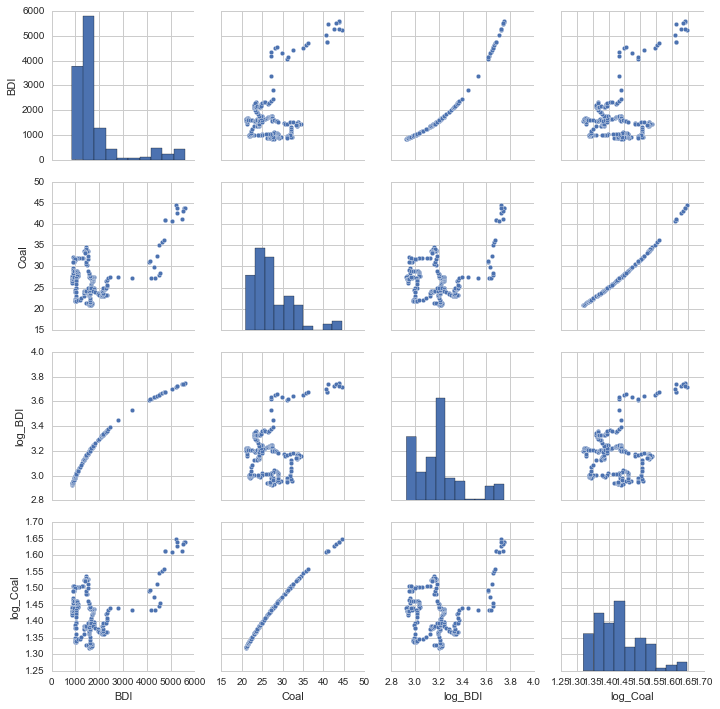

In [16]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(coal_early2, size=2.5);
plt.show()


In [17]:
from datetime import datetime
coal_early2new['Date'] = pd.to_datetime(coal_early2new['Date'])
date = coal_early2new['Date']
coal_early2new.dtypes

Date        datetime64[ns]
BDI                 object
Coal                object
log_BDI             object
log_Coal            object
dtype: object

In [18]:
coal_early2new.head()

,Date,BDI,Coal,log_BDI,log_Coal
0,2000-02-18,1454,21.3,3.16256,1.32838
1,2000-02-25,1511,21.3,3.17926,1.32838
2,2000-03-03,1578,20.9,3.19811,1.32015
3,2000-03-10,1645,21,3.21617,1.32222
4,2000-03-17,1630,21,3.21219,1.32222


In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = coal_early2[['BDI']]
Y = coal_early2[['Coal']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Coal   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     80.51
Date:                Fri, 25 Mar 2016   Prob (F-statistic):           1.68e-16
Time:                        10:19:55   Log-Likelihood:                -603.32
No. Observations:                 211   AIC:                             1211.
Df Residuals:                     209   BIC:                             1217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         23.1686      0.567     40.854      0.000        22.051    24.287
BDI            0.0024      0.000      8.973      0.000         0.002     0.003
==============================================================================
Omnibus:                       61.019   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.569
Skew:                           0.419   Prob(JB):                     0.000252
Kurtosis:                       1.913   Cond. No.                     4.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


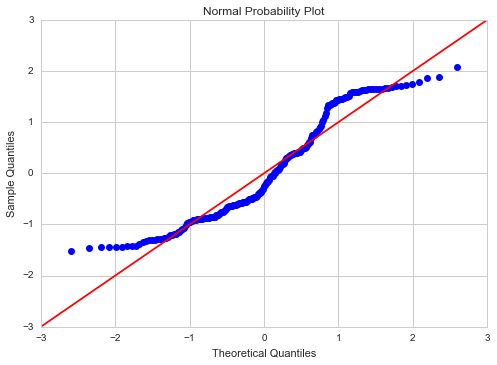

In [20]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show() #bad

In [21]:
X = coal_early2[['log_BDI']]
Y = coal_early2[['log_Coal']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()
#bad again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_Coal   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     26.73
Date:                Fri, 25 Mar 2016   Prob (F-statistic):           5.46e-07
Time:                        10:25:05   Log-Likelihood:                 266.41
No. Observations:                 211   AIC:                            -528.8
Df Residuals:                     209   BIC:                            -522.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.0422      0.076     13.746      0.000         0.893     1.192
log_BDI        0.1221      0.024      5.170      0.000         0.076     0.169
==============================================================================
Omnibus:                       42.994   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.308
Skew:                           0.349   Prob(JB):                      0.00129
Kurtosis:                       1.987   Cond. No.                         56.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### RDF model 

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = coal_early2new[['BDI']].values
y = coal_early2new['Coal'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [23]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [27]:
#do multiple times to see what parameters are the best
rdf_model_coalearly = fit_predict_model(X_train,y_train)
print (rdf_model_coalearly.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [28]:
X = coal_early2new[['BDI']].values
y = coal_early2new['Coal'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 6.758, test: 7.316
R^2 train: 0.717, test: 0.720


### RDF vs LR vs Transformed 2/18/2000 - 2/27/2004

In [29]:
coal_predicted_early = forest.predict(X)
coal_predicted_early = pd.DataFrame(coal_predicted_early)
coal_early2new['Predicted_Coal_RDF'] = coal_predicted_early
rdf_error = (abs(coal_early2new['Predicted_Coal_RDF'] - coal_early2new['Coal'])/coal_early2new['Coal'])*100
coal_early2new['RDF_Error'] = rdf_error
lr_predicted = 23.1686 + (coal_early2new['BDI']*0.0024)
coal_early2new['Predicted_Coal_LR'] = lr_predicted
lr_error = (abs(coal_early2new['Predicted_Coal_LR'] - coal_early2new['Coal'])/coal_early2new['Coal'])*100
coal_early2new['LR_Error'] = lr_error
predicted_transform = 10**(1.0422 + (coal_early2new['log_BDI']*0.1221))
coal_early2new['Predicted_Coal_Trans'] = predicted_transform
trans_error = (abs(coal_early2new['Predicted_Coal_Trans'] - coal_early2new['Coal'])/coal_early2new['Coal'])*100
coal_early2new['Trans_Error'] = trans_error

print("Average RDF error is: %.3f" % (rdf_error.mean())) #this model looks worse than 
print("Average LR error is: %.3f" % (lr_error.mean()))
print("Average Trans error is: %.3f" % (trans_error.mean()))
coal_early2new

Average RDF error is: 7.748
Average LR error is: 13.288
Average Trans error is: 13.534


,Date,BDI,Coal,log_BDI,log_Coal,Predicted_Coal_RDF,RDF_Error,Predicted_Coal_LR,LR_Error,Predicted_Coal_Trans,Trans_Error
0,2000-02-18,1454,21.3,3.16256,1.32838,27.792140,30.4795,26.6582,25.1559,26.8132,25.8837
1,2000-02-25,1511,21.3,3.17926,1.32838,26.657832,25.1541,26.795,25.7981,26.9394,26.4761
2,2000-03-03,1578,20.9,3.19811,1.32015,24.535050,17.3926,26.9558,28.9751,27.0825,29.5814
3,2000-03-10,1645,21,3.21617,1.32222,23.798825,13.3277,27.1166,29.1267,27.2204,29.6208
4,2000-03-17,1630,21,3.21219,1.32222,23.978141,14.1816,27.0806,28.9552,27.1899,29.4759
5,2000-03-24,1618,21,3.20898,1.32222,23.928367,13.9446,27.0518,28.8181,27.1654,29.3591
6,2000-03-31,1660,21,3.22011,1.32222,23.651819,12.6277,27.1526,29.2981,27.2505,29.7645
7,2000-04-07,1684,21.2,3.22634,1.32634,23.984788,13.1358,27.2102,28.35,27.2983,28.7658
8,2000-04-14,1676,21.4,3.22427,1.33041,23.984788,12.0785,27.191,27.0607,27.2825,27.4882
9,2000-04-21,1656,21.5,3.21906,1.33244,23.711198,10.2846,27.143,26.2465,27.2425,26.7094


In [36]:
newpred2 = data [['Date','BDI','log_BDI']][0:215]
newpred = data [['BDI']][0:215]
newpred2.tail()

,Date,BDI,log_BDI
210,1/14/2000,1404,3.147367
211,1/21/2000,1384,3.141136
212,1/28/2000,1329,3.123525
213,2/4/2000,1280,3.107210
214,2/11/2000,1345,3.128722


In [37]:
#new predictions
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date', 'BDI','log_BDI']
lr_predictednew = 23.1686 + (newpred2['BDI']*0.0024)
newpred2['Predicted_Coal_LR'] = lr_predictednew
trans_predictednew = 10**(1.0422 + (newpred2['log_BDI']*0.1221))
newpred2['Predicted_Coal_Trans'] = trans_predictednew
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Predicted_Coal_RDF'] = df_new_pred
newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2


,Date,BDI,log_BDI,Predicted_Coal_LR,Predicted_Coal_Trans,Predicted_Coal_RDF
0,1996-01-05,1583,3.19948,26.9678,27.093,25.358912
1,1996-01-12,1550,3.19033,26.8886,27.0234,25.269689
2,1996-01-19,1538,3.18696,26.8598,26.9977,29.070713
3,1996-01-26,1529,3.18441,26.8382,26.9784,29.195096
4,1996-02-02,1484,3.17143,26.7302,26.8802,32.105527
5,1996-02-09,1453,3.16227,26.6558,26.811,28.667889
6,1996-02-16,1437,3.15746,26.6174,26.7748,28.169393
7,1996-02-23,1400,3.14613,26.5286,26.6896,28.828182
8,1996-03-01,1357,3.13258,26.4254,26.5881,27.863549
9,1996-03-08,1350,3.13033,26.4086,26.5714,26.513218


In [38]:
frames = [newpred2,coal_early2new]
combined = pd.concat(frames)
combined

,BDI,Coal,Date,LR_Error,Predicted_Coal_LR,Predicted_Coal_RDF,Predicted_Coal_Trans,RDF_Error,Trans_Error,log_BDI,log_Coal
0,1583,NaN,1996-01-05,NaN,26.9678,25.358912,27.093,NaN,NaN,3.19948,NaN
1,1550,NaN,1996-01-12,NaN,26.8886,25.269689,27.0234,NaN,NaN,3.19033,NaN
2,1538,NaN,1996-01-19,NaN,26.8598,29.070713,26.9977,NaN,NaN,3.18696,NaN
3,1529,NaN,1996-01-26,NaN,26.8382,29.195096,26.9784,NaN,NaN,3.18441,NaN
4,1484,NaN,1996-02-02,NaN,26.7302,32.105527,26.8802,NaN,NaN,3.17143,NaN
5,1453,NaN,1996-02-09,NaN,26.6558,28.667889,26.811,NaN,NaN,3.16227,NaN
6,1437,NaN,1996-02-16,NaN,26.6174,28.169393,26.7748,NaN,NaN,3.15746,NaN
7,1400,NaN,1996-02-23,NaN,26.5286,28.828182,26.6896,NaN,NaN,3.14613,NaN
8,1357,NaN,1996-03-01,NaN,26.4254,27.863549,26.5881,NaN,NaN,3.13258,NaN
9,1350,NaN,1996-03-08,NaN,26.4086,26.513218,26.5714,NaN,NaN,3.13033,NaN


In [39]:
combined.to_csv("C:/Users/msteinme/Documents/coalearly.csv")

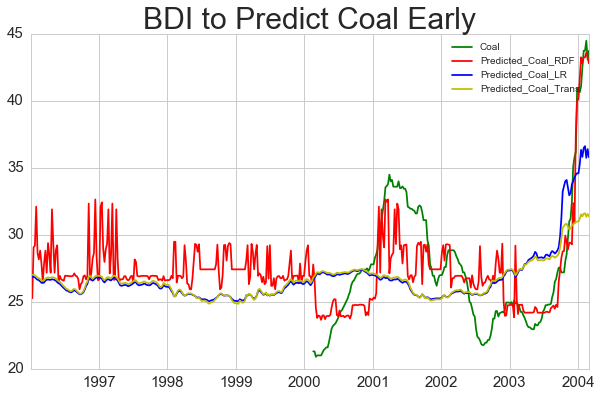

In [42]:
#can clearly see that BDI isn't very good at predicting coal values
x = (combined['Date'])
y1 = (combined['Coal'])
y2 = (combined['Predicted_Coal_RDF'])
y3 = (combined['Predicted_Coal_LR'])
y4 = (combined['Predicted_Coal_Trans'])

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'r')
ax.plot(x,y3,'b')
ax.plot(x,y4,'y')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('BDI to Predict Coal Early', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show()
#still BDI not good variable to predict Coal

## Now going to predict coal using dollar and freight
[Top](#Table-of-Contents)

In [27]:
import pandas as pd
import numpy as np
data = pd.read_csv("C:/Users/msteinme/Documents/coalfreightbdi.csv")
coal_fd = data[['Date','BDI','Coal','Freight','Dollar']]
coal_fd = coal_fd.dropna()
coal_fdnew = np.array(coal_fd)
coal_fdnew = pd.DataFrame(coal_fdnew)
coal_fdnew.columns = ['Date','BDI','Coal','Freight','Dollar']
coal_fdnew.head()

,Date,BDI,Coal,Freight,Dollar
0,2/18/2000,1454,21.3,7.5,104.63
1,2/25/2000,1511,21.3,7.5,105.26
2,3/3/2000,1578,20.9,7.75,106
3,3/10/2000,1645,21,7.85,105.71
4,3/17/2000,1630,21,7.85,105.2


In [4]:
coal_fd.describe()

,BDI,Coal,Freight,Dollar
count,470.000000,470.000000,470.000000,470.000000
mean,1955.274468,50.916574,11.543468,94.666291
std,1336.586715,25.122266,5.935808,13.298739
min,513.000000,20.900000,4.000000,78.709000
25%,986.000000,27.200000,7.000000,82.504250
50%,1494.000000,49.900000,10.300000,89.715000
75%,2326.750000,73.112500,13.807500,107.530000
max,6172.000000,110.750000,32.900000,119.900000


In [5]:
coal_fd.corr()

,BDI,Coal,Freight,Dollar
BDI,1.000000,-0.181718,0.872587,-0.235545
Coal,-0.181718,1.000000,0.241448,-0.804114
Freight,0.872587,0.241448,1.000000,-0.605357
Dollar,-0.235545,-0.804114,-0.605357,1.000000


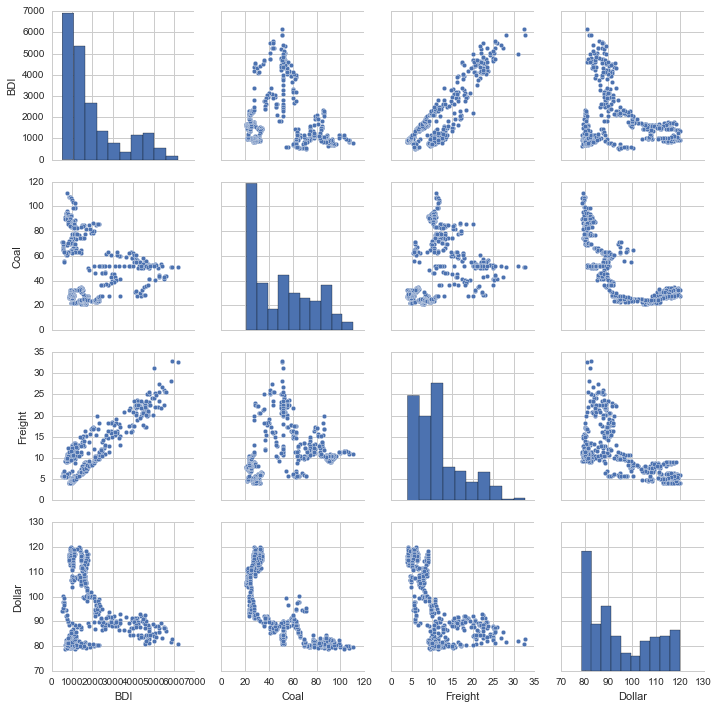

In [47]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(coal_fd, size=2.5);
plt.show()
#nothing is normally distributed

In [28]:
from datetime import datetime
coal_fdnew['Date'] = pd.to_datetime(coal_fdnew['Date'])
date = coal_fdnew['Date']
coal_fdnew.dtypes

Date       datetime64[ns]
BDI                object
Coal               object
Freight            object
Dollar             object
dtype: object

In [29]:
coal_fdnew.head()

,Date,BDI,Coal,Freight,Dollar
0,2000-02-18,1454,21.3,7.5,104.63
1,2000-02-25,1511,21.3,7.5,105.26
2,2000-03-03,1578,20.9,7.75,106
3,2000-03-10,1645,21,7.85,105.71
4,2000-03-17,1630,21,7.85,105.2


In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = coal_fd[['BDI','Freight','Dollar']]
Y = coal_fd[['Coal']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()
#much better R^2 once the dollar was added

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Coal   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     694.7
Date:                Sun, 27 Mar 2016   Prob (F-statistic):          1.58e-171
Time:                        16:56:19   Log-Likelihood:                -1782.1
No. Observations:                 470   AIC:                             3572.
Df Residuals:                     466   BIC:                             3589.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        168.1569      8.225     20.444      0.000       151.994   184.320
BDI           -0.0161      0.001    -13.891      0.000        -0.018    -0.014
Freight        2.5332      0.318      7.959      0.000         1.908     3.159
Dollar        -1.2152      0.071    -17.020      0.000        -1.356    -1.075
==============================================================================
Omnibus:                       28.358   Durbin-Watson:                   0.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.647
Skew:                           0.109   Prob(JB):                      0.00296
Kurtosis:                       2.260   Cond. No.                     3.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


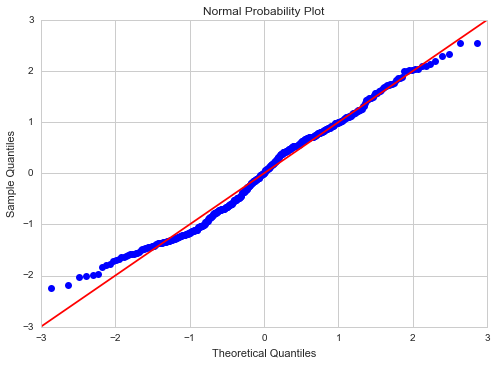

In [49]:
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()
#looks pretty good

### RDF model using BDI, freight, dollar to predict Coal

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = coal_fdnew[['BDI','Freight','Dollar']].values
y = coal_fdnew['Coal'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [32]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [56]:
rdf_model_coalfd = fit_predict_model(X_train,y_train)
print (rdf_model_coalfd.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [33]:
X = coal_fdnew[['BDI','Freight','Dollar']].values
y = coal_fdnew['Coal'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#interesting that freight is least important

MSE train: 8.780, test: 40.177
R^2 train: 0.986, test: 0.939
[ 0.17543948  0.03433132  0.7902292 ]


### RDF vs MLR for BDI, Freight, Dollar

In [34]:
coal_predicted_fd = forest.predict(X)
coal_predicted_fd = pd.DataFrame(coal_predicted_fd)
coal_fdnew['Predicted_Coal_RDF'] = coal_predicted_fd
rdf_error = (abs(coal_fdnew['Predicted_Coal_RDF'] - coal_fdnew['Coal'])/coal_fdnew['Coal'])*100
coal_fdnew['RDF_Error'] = rdf_error
mlr_predicted = 168.1569 - (coal_fdnew['BDI']*0.0161) + (coal_fdnew['Freight']*2.5332) - (coal_fdnew['Dollar']*1.2152)
coal_fdnew['Predicted_Coal_MLR'] = mlr_predicted
mlr_error = (abs(coal_fdnew['Predicted_Coal_MLR'] - coal_fdnew['Coal'])/coal_fdnew['Coal'])*100
coal_fdnew['MLR_Error'] = mlr_error

print("Average RDF error is: %.3f" % (rdf_error.mean())) 
print("Average MLR error is: %.3f" % (mlr_error.mean()))

coal_fdnew

Average RDF error is: 4.773
Average MLR error is: 23.337


,Date,BDI,Coal,Freight,Dollar,Predicted_Coal_RDF,RDF_Error,Predicted_Coal_MLR,MLR_Error
0,2000-02-18,1454,21.3,7.5,104.63,22.579514,6.00711,36.6001,71.8316
1,2000-02-25,1511,21.3,7.5,105.26,22.303637,4.71191,34.9168,63.9289
2,2000-03-03,1578,20.9,7.75,106,22.328311,6.83402,33.5722,60.6325
3,2000-03-10,1645,21,7.85,105.71,21.759858,3.61837,33.0992,57.6154
4,2000-03-17,1630,21,7.85,105.2,21.944602,4.49811,33.9605,61.7166
5,2000-03-24,1618,21,7.85,104.77,22.244314,5.9253,34.6762,65.1248
6,2000-03-31,1660,21,7.85,105.44,21.798316,3.80151,33.1858,58.0278
7,2000-04-07,1684,21.2,7.95,105.97,21.822319,2.93547,32.4087,52.8712
8,2000-04-14,1676,21.4,8.1,105.47,21.957379,2.60457,33.5251,56.6592
9,2000-04-21,1656,21.5,8.1,107.45,22.642757,5.31515,31.441,46.2371


In [36]:
newpred2 = data [['Date','BDI','Freight','Dollar']][0:215]
newpred = data [['BDI','Freight','Dollar']][0:215]

In [37]:
#new predictions
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date', 'BDI','Freight','Dollar']
mlr_predictednew = 168.1569 - (newpred2['BDI']*0.0161) + (newpred2['Freight']*2.5332) - (newpred2['Dollar']*1.2152)
newpred2['Predicted_Coal_MLR'] = mlr_predictednew
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Predicted_Coal_RDF'] = df_new_pred
newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

,Date,BDI,Freight,Dollar,Predicted_Coal_MLR,Predicted_Coal_RDF
0,1996-01-05,1583,4.15,85.06,49.8185,65.321456
1,1996-01-12,1550,4.55,85.06,51.363,65.321456
2,1996-01-19,1538,4.55,86.75,49.5026,64.567946
3,1996-01-26,1529,4.55,87.64,48.5659,62.498278
4,1996-02-02,1484,4.6,87.01,50.1827,64.391946
5,1996-02-09,1453,4.6,86.87,50.8519,64.568946
6,1996-02-16,1437,4.15,85.91,51.1361,64.888428
7,1996-02-23,1400,4.25,85.43,52.5685,65.273039
8,1996-03-01,1357,4.35,86.49,52.226,64.859366
9,1996-03-08,1350,5.5,86.81,54.863,64.628362


In [39]:
frames = [newpred2,coal_fdnew]
combined = pd.concat(frames)
combined

,BDI,Coal,Date,Dollar,Freight,MLR_Error,Predicted_Coal_MLR,Predicted_Coal_RDF,RDF_Error
0,1583,NaN,1996-01-05,85.06,4.15,NaN,49.8185,65.321456,NaN
1,1550,NaN,1996-01-12,85.06,4.55,NaN,51.363,65.321456,NaN
2,1538,NaN,1996-01-19,86.75,4.55,NaN,49.5026,64.567946,NaN
3,1529,NaN,1996-01-26,87.64,4.55,NaN,48.5659,62.498278,NaN
4,1484,NaN,1996-02-02,87.01,4.6,NaN,50.1827,64.391946,NaN
5,1453,NaN,1996-02-09,86.87,4.6,NaN,50.8519,64.568946,NaN
6,1437,NaN,1996-02-16,85.91,4.15,NaN,51.1361,64.888428,NaN
7,1400,NaN,1996-02-23,85.43,4.25,NaN,52.5685,65.273039,NaN
8,1357,NaN,1996-03-01,86.49,4.35,NaN,52.226,64.859366,NaN
9,1350,NaN,1996-03-08,86.81,5.5,NaN,54.863,64.628362,NaN


In [41]:
combined.to_csv("C:/Users/msteinme/Documents/coalearlydollarfrieght.csv")

In [40]:
x = (combined['Date'])
y1 = (combined['Coal'])
y2 = (combined['Predicted_Coal_RDF'])
y3 = (combined['Predicted_Coal_MLR'])

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'r')
ax.plot(x,y3,'b')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('BDI, Freight, Dollar to Predict Coal', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show()

### I am now curious if just had dollar and BDI, so I would need dollar values from 2005-2012, I think this would predict China coal better
[Top](#Table-of-Contents)

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("C:/Users/msteinme/Documents/coalfreightbdi.csv")
coal_fd = data[['Date','BDI','Coal','Freight','Dollar_All']]
coal_fd = coal_fd.dropna()
coal_fdnew = np.array(coal_fd)
coal_fdnew = pd.DataFrame(coal_fdnew)
coal_fdnew.columns = ['Date','BDI','Coal','Freight','Dollar_All']
coal_fdnew.tail()

,Date,BDI,Coal,Freight,Dollar_All
786,3/13/2015,562,64.95,5.7,100.33
787,3/20/2015,591,64.05,5.7,97.909
788,3/27/2015,596,63.3,5.7,97.291
789,4/3/2015,588,55.6,5.65,96.545
790,4/10/2015,580,54.65,6.85,99.338


In [4]:
coal_fd.describe()

,BDI,Coal,Freight,Dollar_All
count,791.000000,791.000000,791.000000,791.000000
mean,2722.970923,66.853034,15.471719,88.876618
std,2211.163051,34.354293,10.855792,12.761327
min,513.000000,20.900000,4.000000,71.657000
25%,1121.000000,34.800000,8.775000,80.177500
50%,1888.000000,62.900000,11.950000,84.400000
75%,3696.500000,89.950000,18.275000,93.385000
max,11612.000000,192.500000,73.350000,119.900000


In [5]:
coal_fd.corr() #so when I have the dollar in now the correlation is slightly less to the other variables except BDI

,BDI,Coal,Freight,Dollar_All
BDI,1.000000,0.245014,0.952179,-0.383362
Coal,0.245014,1.000000,0.411525,-0.772876
Freight,0.952179,0.411525,1.000000,-0.525301
Dollar_All,-0.383362,-0.772876,-0.525301,1.000000


In [5]:
from datetime import datetime
coal_fdnew['Date'] = pd.to_datetime(coal_fdnew['Date'])
date = coal_fdnew['Date']
coal_fdnew.dtypes

Date          datetime64[ns]
BDI                   object
Coal                  object
Freight               object
Dollar_All            object
dtype: object

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = coal_fd[['BDI','Freight','Dollar_All']]
Y = coal_fd[['Coal']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()
#R^2 is quite a bit worse now having dollar values from 2005-2012 from 0.817 to 0.641

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Coal   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     468.4
Date:                Wed, 30 Mar 2016   Prob (F-statistic):          1.51e-174
Time:                        09:13:23   Log-Likelihood:                -3514.3
No. Observations:                 791   AIC:                             7037.
Df Residuals:                     787   BIC:                             7055.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        214.4230      7.709     27.815      0.000       199.290   229.556
BDI           -0.0119      0.001     -9.780      0.000        -0.014    -0.010
Freight        2.5352      0.269      9.433      0.000         2.008     3.063
Dollar_All    -1.7375      0.076    -22.972      0.000        -1.886    -1.589
==============================================================================
Omnibus:                      101.237   Durbin-Watson:                   0.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.612
Skew:                           0.900   Prob(JB):                     8.84e-33
Kurtosis:                       4.113   Cond. No.                     3.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


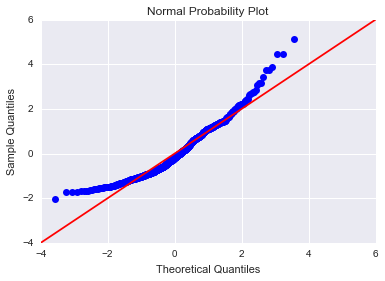

In [9]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show() #skew got alot worse

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = coal_fdnew[['BDI','Freight','Dollar_All']].values
y = coal_fdnew['Coal'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [11]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [14]:
rdf_model_coalfd = fit_predict_model(X_train,y_train)
print (rdf_model_coalfd.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [7]:
X = coal_fdnew[['BDI','Freight','Dollar_All']].values
y = coal_fdnew['Coal'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 24.985, test: 116.418
R^2 train: 0.979, test: 0.902
[ 0.13312786  0.06217709  0.80469505]


In [8]:
coal_predicted_fd = forest.predict(X)
coal_predicted_fd = pd.DataFrame(coal_predicted_fd)
coal_fdnew['Predicted_Coal_RDF'] = coal_predicted_fd
rdf_error = (abs(coal_fdnew['Predicted_Coal_RDF'] - coal_fdnew['Coal'])/coal_fdnew['Coal'])*100
coal_fdnew['RDF_Error'] = rdf_error

print("Average RDF error is: %.3f" % (rdf_error.mean())) 

coal_fdnew.head()

Average RDF error is: 5.672


,Date,BDI,Coal,Freight,Dollar_All,Predicted_Coal_RDF,RDF_Error
0,2000-02-18,1454,21.3,7.5,104.63,23.289755,9.34157
1,2000-02-25,1511,21.3,7.5,105.26,22.663387,6.40088
2,2000-03-03,1578,20.9,7.75,106,22.188046,6.1629
3,2000-03-10,1645,21,7.85,105.71,21.568759,2.70838
4,2000-03-17,1630,21,7.85,105.2,21.656301,3.12525


In [23]:
newpred2 = data [['Date','BDI','Freight','Dollar_All']][0:215]
newpred = data [['BDI','Freight','Dollar_All']][0:215]

In [24]:
#new predictions
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date', 'BDI','Freight','Dollar_All']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Predicted_Coal_RDF'] = df_new_pred
newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

,Date,BDI,Freight,Dollar_All,Predicted_Coal_RDF
0,1996-01-05,1583,4.15,85.06,74.857929
1,1996-01-12,1550,4.55,85.06,74.809196
2,1996-01-19,1538,4.55,86.75,69.773539
3,1996-01-26,1529,4.55,87.64,67.115103
4,1996-02-02,1484,4.6,87.01,68.669484
5,1996-02-09,1453,4.6,86.87,69.511484
6,1996-02-16,1437,4.15,85.91,74.457595
7,1996-02-23,1400,4.25,85.43,75.038484
8,1996-03-01,1357,4.35,86.49,74.370502
9,1996-03-08,1350,5.5,86.81,69.962839


In [25]:
frames = [newpred2,coal_fdnew]
combined = pd.concat(frames)
combined

,BDI,Coal,Date,Dollar_All,Freight,Predicted_Coal_RDF,RDF_Error
0,1583,NaN,1996-01-05,85.06,4.15,74.857929,NaN
1,1550,NaN,1996-01-12,85.06,4.55,74.809196,NaN
2,1538,NaN,1996-01-19,86.75,4.55,69.773539,NaN
3,1529,NaN,1996-01-26,87.64,4.55,67.115103,NaN
4,1484,NaN,1996-02-02,87.01,4.6,68.669484,NaN
5,1453,NaN,1996-02-09,86.87,4.6,69.511484,NaN
6,1437,NaN,1996-02-16,85.91,4.15,74.457595,NaN
7,1400,NaN,1996-02-23,85.43,4.25,75.038484,NaN
8,1357,NaN,1996-03-01,86.49,4.35,74.370502,NaN
9,1350,NaN,1996-03-08,86.81,5.5,69.962839,NaN


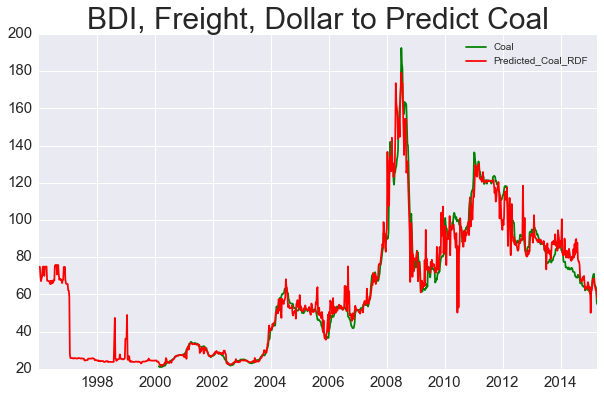

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
x = (combined['Date'])
y1 = (combined['Coal'])
y2 = (combined['Predicted_Coal_RDF'])

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'r')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('BDI, Freight, Dollar to Predict Coal', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show()

In [27]:
combined.to_csv("C:/Users/msteinme/Documents/newcoal.csv")

### BDI and Dollar to Predict Coal

In [28]:
import pandas as pd
import numpy as np
data = pd.read_csv("C:/Users/msteinme/Documents/coalfreightbdi.csv")
coal_fd = data[['Date','BDI','Coal','Dollar_All']]
coal_fd = coal_fd.dropna()
coal_fdnew = np.array(coal_fd)
coal_fdnew = pd.DataFrame(coal_fdnew)
coal_fdnew.columns = ['Date','BDI','Coal','Dollar_All']
coal_fdnew.tail()

,Date,BDI,Coal,Dollar_All
836,2/26/2016,327,50.45,98.148
837,3/4/2016,349,51,97.34
838,3/11/2016,388,51.5,96.172
839,3/18/2016,395,52.2,95.086
840,3/25/2016,398,51.75,96.273


In [30]:
coal_fd.describe()

,BDI,Coal,Dollar_All
count,841.000000,841.000000,841.000000
mean,2599.941736,66.176219,89.349092
std,2200.341338,33.440450,12.523780
min,291.000000,20.900000,71.657000
25%,1037.000000,40.100000,80.264000
50%,1740.000000,60.400000,85.110000
75%,3379.000000,88.150000,96.269000
max,11612.000000,192.500000,119.900000


In [31]:
coal_fd.corr()

,BDI,Coal,Dollar_All
BDI,1.000000,0.256391,-0.402870
Coal,0.256391,1.000000,-0.773525
Dollar_All,-0.402870,-0.773525,1.000000


In [32]:
from datetime import datetime
coal_fdnew['Date'] = pd.to_datetime(coal_fdnew['Date'])
date = coal_fdnew['Date']
coal_fdnew.dtypes

Date          datetime64[ns]
BDI                   object
Coal                  object
Dollar_All            object
dtype: object

In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = coal_fd[['BDI','Dollar_All']]
Y = coal_fd[['Coal']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() #R^2 went from .641 to .602 when got rid of freight so that didn't really matter that much

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Coal   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     633.7
Date:                Wed, 30 Mar 2016   Prob (F-statistic):          2.28e-168
Time:                        09:57:07   Log-Likelihood:                -3757.1
No. Observations:                 841   AIC:                             7520.
Df Residuals:                     838   BIC:                             7535.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        259.6645      6.164     42.126      0.000       247.566   271.763
BDI           -0.0010      0.000     -2.769      0.006        -0.002    -0.000
Dollar_All    -2.1364      0.064    -33.601      0.000        -2.261    -2.012
==============================================================================
Omnibus:                      117.441   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.994
Skew:                           0.914   Prob(JB):                     9.13e-42
Kurtosis:                       4.432   Cond. No.                     2.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = coal_fdnew[['BDI','Dollar_All']].values
y = coal_fdnew['Coal'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [35]:
def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [39]:
rdf_model_coalfd = fit_predict_model(X_train,y_train)
print (rdf_model_coalfd.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [40]:
X = coal_fdnew[['BDI','Dollar_All']].values
y = coal_fdnew['Coal'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 71.125, test: 142.513
R^2 train: 0.938, test: 0.863
[ 0.14139589  0.85860411]


In [41]:
coal_predicted_fd = forest.predict(X)
coal_predicted_fd = pd.DataFrame(coal_predicted_fd)
coal_fdnew['Predicted_Coal_RDF'] = coal_predicted_fd
rdf_error = (abs(coal_fdnew['Predicted_Coal_RDF'] - coal_fdnew['Coal'])/coal_fdnew['Coal'])*100
coal_fdnew['RDF_Error'] = rdf_error
print("Average RDF error is: %.3f" % (rdf_error.mean())) 
coal_fdnew.head()

Average RDF error is: 8.749


,Date,BDI,Coal,Dollar_All,Predicted_Coal_RDF,RDF_Error
0,2000-02-18,1454,21.3,104.63,23.591645,10.7589
1,2000-02-25,1511,21.3,105.26,23.180421,8.82827
2,2000-03-03,1578,20.9,106,23.122761,10.6352
3,2000-03-10,1645,21,105.71,22.940433,9.24016
4,2000-03-17,1630,21,105.2,22.993642,9.49353


In [45]:
newpred2 = data [['Date','BDI','Dollar_All']][0:215]
newpred = data [['BDI','Dollar_All']][0:215]

In [46]:
#new predictions
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date', 'BDI','Dollar_All']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Predicted_Coal_RDF'] = df_new_pred
newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

,Date,BDI,Dollar_All,Predicted_Coal_RDF
0,1996-01-05,1583,85.06,67.126693
1,1996-01-12,1550,85.06,66.951102
2,1996-01-19,1538,86.75,65.474692
3,1996-01-26,1529,87.64,63.935582
4,1996-02-02,1484,87.01,65.353477
5,1996-02-09,1453,86.87,65.446451
6,1996-02-16,1437,85.91,67.379317
7,1996-02-23,1400,85.43,68.045848
8,1996-03-01,1357,86.49,67.641251
9,1996-03-08,1350,86.81,65.623680


In [47]:
frames = [newpred2,coal_fdnew]
combined = pd.concat(frames)
combined

,BDI,Coal,Date,Dollar_All,Predicted_Coal_RDF,RDF_Error
0,1583,NaN,1996-01-05,85.06,67.126693,NaN
1,1550,NaN,1996-01-12,85.06,66.951102,NaN
2,1538,NaN,1996-01-19,86.75,65.474692,NaN
3,1529,NaN,1996-01-26,87.64,63.935582,NaN
4,1484,NaN,1996-02-02,87.01,65.353477,NaN
5,1453,NaN,1996-02-09,86.87,65.446451,NaN
6,1437,NaN,1996-02-16,85.91,67.379317,NaN
7,1400,NaN,1996-02-23,85.43,68.045848,NaN
8,1357,NaN,1996-03-01,86.49,67.641251,NaN
9,1350,NaN,1996-03-08,86.81,65.623680,NaN


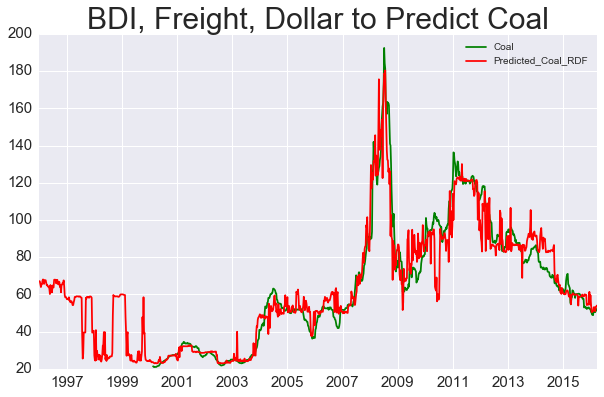

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
x = (combined['Date'])
y1 = (combined['Coal'])
y2 = (combined['Predicted_Coal_RDF'])

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'r')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('BDI, Freight, Dollar to Predict Coal', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show() #looks pretty bad

In [49]:
combined.to_csv("C:/Users/msteinme/Documents/newcoal.csv")

## Using BDI and Dollar to Predict Freight
[Top](#Table-of-Contents)

In [3]:
freightdollar = data[['Date','BDI','Freight', 'Dollar']]
freightdollar = freightdollar.dropna()
print(freightdollar.shape)
freightdollarnew = np.array(freightdollar)
freightdollarnew = pd.DataFrame(freightdollarnew)
freightdollarnew.columns = ['Date','BDI','Freight','Dollar']

(685, 4)


In [4]:
freightdollar.describe()

,BDI,Freight,Dollar
count,685.000000,685.000000,685.000000
mean,1709.388321,9.678234,95.006025
std,1171.520565,5.678921,11.446944
min,513.000000,3.500000,78.709000
25%,982.000000,5.500000,85.870000
50%,1319.000000,7.750000,94.240000
75%,1722.000000,11.400000,101.720000
max,6172.000000,32.900000,119.900000


In [5]:
freightdollar.corr()

,BDI,Freight,Dollar
BDI,1.000000,0.873764,-0.239602
Freight,0.873764,1.000000,-0.531472
Dollar,-0.239602,-0.531472,1.000000


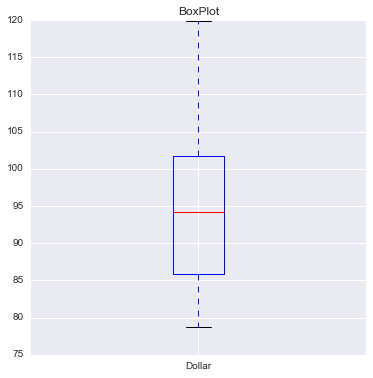

In [7]:
plt.show(freightdollarnew['Dollar'].plot(kind='box',figsize=(6,6),title=('BoxPlot')))

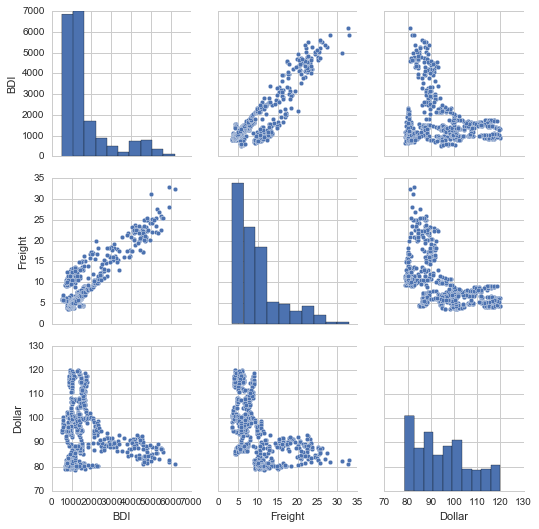

In [8]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(freightdollar, size=2.5);
plt.show()

In [9]:
from datetime import datetime
freightdollarnew['Date'] = pd.to_datetime(freightdollarnew['Date'])
date = freightdollarnew['Date']
freightdollarnew.dtypes

Date       datetime64[ns]
BDI                object
Freight            object
Dollar             object
dtype: object

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = freightdollar[['BDI','Dollar']]
Y = freightdollar[['Freight']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Freight   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     2356.
Date:                Mon, 28 Mar 2016   Prob (F-statistic):          5.82e-307
Time:                        07:48:36   Log-Likelihood:                -1452.9
No. Observations:                 685   AIC:                             2912.
Df Residuals:                     682   BIC:                             2925.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         19.2236      0.702     27.370      0.000        17.845    20.603
BDI            0.0038    6.8e-05     56.460      0.000         0.004     0.004
Dollar        -0.1695      0.007    -24.365      0.000        -0.183    -0.156
==============================================================================
Omnibus:                        5.647   Durbin-Watson:                   0.182
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                5.628
Skew:                          -0.222   Prob(JB):                       0.0600
Kurtosis:                       3.008   Cond. No.                     1.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


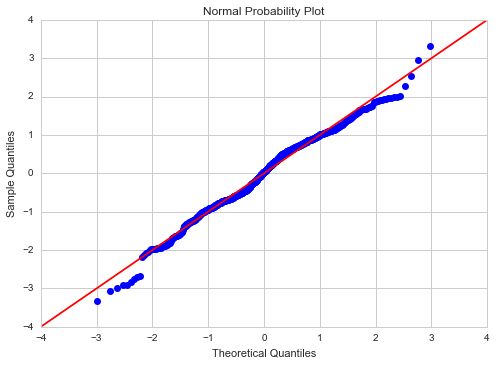

In [12]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()

### RDF for BDI and Dollar to predict freight

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X=freightdollarnew[['BDI','Dollar']].values
y=freightdollarnew['Freight'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)


In [14]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [22]:
rdf_model_freightdoll = fit_predict_model(X_train,y_train)
print (rdf_model_freightdoll.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [24]:
X=freightdollarnew[['BDI','Dollar']].values
y=freightdollarnew['Freight'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 0.708, test: 1.578
R^2 train: 0.976, test: 0.958
[ 0.83455048  0.16544952]


### Summary RDF model vs MLR

In [28]:
freight_dollarpredicted = forest.predict(X)
freight_dollarpredicted = pd.DataFrame(freight_dollarpredicted)
freight_dollarpredicted.columns = ['Predicted_Freight_RDF']
freightdollarnew['Predicted_Freight_RDF'] = freight_dollarpredicted
rdf_error = (abs(freightdollarnew['Predicted_Freight_RDF'] - freightdollarnew['Freight'])/freightdollarnew['Freight'])*100
freightdollarnew['RDF_Error'] = rdf_error
mlr_predicted = 19.2236 + (freightdollarnew['BDI']*0.0038) - (freightdollarnew['Dollar']*0.1695)
freightdollarnew['Predicted_Freight_MLR'] = mlr_predicted
mlr_error = (abs(freightdollarnew['Predicted_Freight_MLR'] - freightdollarnew['Freight'])/freightdollarnew['Freight'])*100
freightdollarnew['MLR_Error'] = mlr_error

print("Average RDF error is: %.3f" % (rdf_error.mean())) #this model looks worse than 
print("Average LR error is: %.3f" % (mlr_error.mean()))
freightdollarnew

Average RDF error is: 7.952
Average LR error is: 21.994


,Date,BDI,Freight,Dollar,Predicted_Freight_RDF,RDF_Error,Predicted_Freight_MLR,MLR_Error
0,1996-01-05,1583,4.15,85.06,9.099746,119.271,10.8213,160.755
1,1996-01-12,1550,4.55,85.06,7.671339,68.6009,10.6959,135.075
2,1996-01-19,1538,4.55,86.75,6.492227,42.6863,10.3639,127.777
3,1996-01-26,1529,4.55,87.64,6.852438,50.603,10.1788,123.71
4,1996-02-02,1484,4.6,87.01,6.974536,51.6203,10.1146,119.883
5,1996-02-09,1453,4.6,86.87,6.675615,45.1221,10.0205,117.838
6,1996-02-16,1437,4.15,85.91,6.015793,44.9589,10.1225,143.915
7,1996-02-23,1400,4.25,85.43,6.290179,48.0042,10.0632,136.782
8,1996-03-01,1357,4.35,86.49,5.955572,36.9097,9.72015,123.452
9,1996-03-08,1350,5.5,86.81,6.482159,17.8574,9.6393,75.2601


In [35]:
newpred2 = data [['Date','BDI','Dollar']][1006:1056]
newpred = data [['BDI','Dollar']][1006:1056]
newpred2

,Date,BDI,Dollar
1006,4/17/2015,597,97.520
1007,4/24/2015,600,96.922
1008,5/1/2015,587,95.297
1009,5/8/2015,574,94.794
1010,5/15/2015,634,93.135
1011,5/22/2015,586,96.014
1012,5/29/2015,589,96.907
1013,6/5/2015,610,96.306
1014,6/12/2015,642,94.972
1015,6/19/2015,779,94.085


In [37]:
#new predictions
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date', 'BDI','Dollar']
mlr_predictednew = 19.2236 + (newpred2['BDI']*0.0038) - (newpred2['Dollar']*0.1695)
newpred2['Predicted_Freight_MLR'] = mlr_predictednew
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Predicted_Freight_RDF'] = df_new_pred
newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

,Date,BDI,Dollar,Predicted_Freight_MLR,Predicted_Freight_RDF
0,2015-04-17,597,97.52,4.96256,5.393949
1,2015-04-24,600,96.922,5.07532,5.430714
2,2015-05-01,587,95.297,5.30136,5.457677
3,2015-05-08,574,94.794,5.33722,5.457667
4,2015-05-15,634,93.135,5.84642,5.487223
5,2015-05-22,586,96.014,5.17603,5.454950
6,2015-05-29,589,96.907,5.03606,5.431527
7,2015-06-05,610,96.306,5.21773,5.430714
8,2015-06-12,642,94.972,5.56545,5.451224
9,2015-06-19,779,94.085,6.23639,5.352882


In [38]:
frames = [freightdollarnew,newpred2]
combined = pd.concat(frames)
combined

,BDI,Date,Dollar,Freight,MLR_Error,Predicted_Freight_MLR,Predicted_Freight_RDF,RDF_Error
0,1583,1996-01-05,85.06,4.15,160.755,10.8213,9.099746,119.271
1,1550,1996-01-12,85.06,4.55,135.075,10.6959,7.671339,68.6009
2,1538,1996-01-19,86.75,4.55,127.777,10.3639,6.492227,42.6863
3,1529,1996-01-26,87.64,4.55,123.71,10.1788,6.852438,50.603
4,1484,1996-02-02,87.01,4.6,119.883,10.1146,6.974536,51.6203
5,1453,1996-02-09,86.87,4.6,117.838,10.0205,6.675615,45.1221
6,1437,1996-02-16,85.91,4.15,143.915,10.1225,6.015793,44.9589
7,1400,1996-02-23,85.43,4.25,136.782,10.0632,6.290179,48.0042
8,1357,1996-03-01,86.49,4.35,123.452,9.72015,5.955572,36.9097
9,1350,1996-03-08,86.81,5.5,75.2601,9.6393,6.482159,17.8574


In [39]:
combined.to_csv("C:/Users/msteinme/Documents/freightdoll.csv")

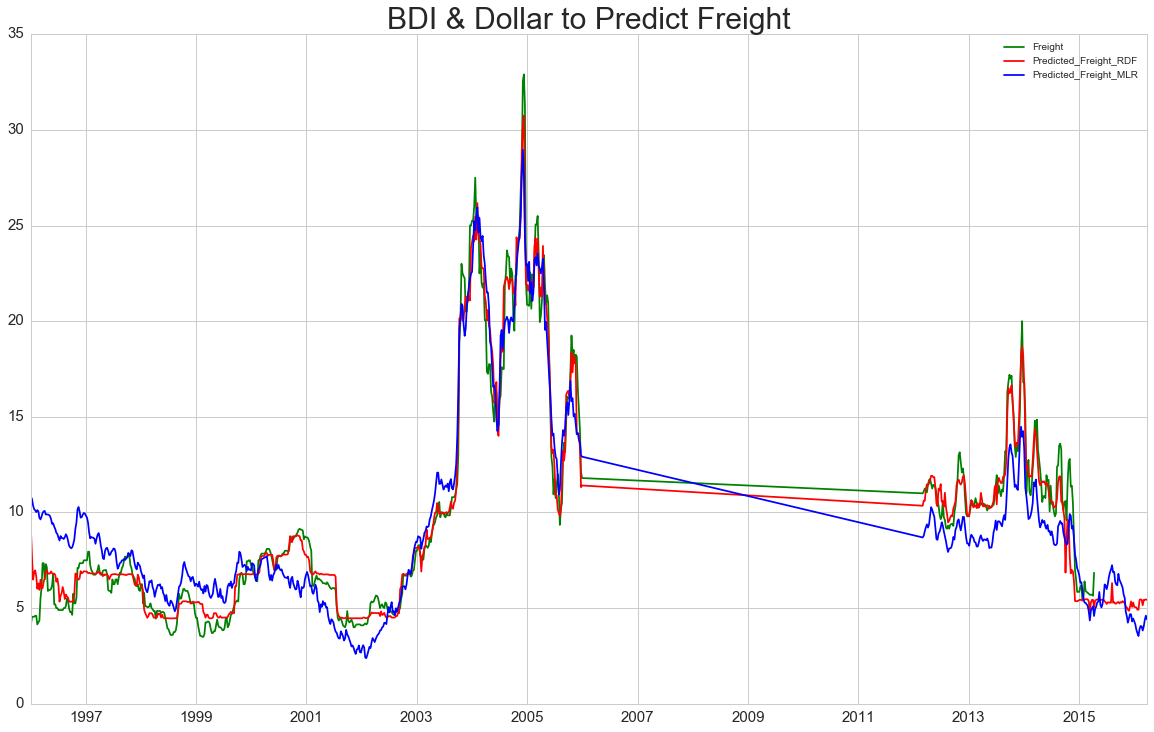

In [40]:
x = (combined['Date'])
y1 = (combined['Freight'])
y2 = (combined['Predicted_Freight_RDF'])
y3 = (combined['Predicted_Freight_MLR'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'r')
ax.plot(x,y3,'b')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('BDI & Dollar to Predict Freight', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
plt.show()

### BDI and All Dollar Values to Predict Freight

In [50]:
freightdollar = data[['Date','BDI','Freight', 'Dollar_All']]
freightdollar = freightdollar.dropna()
print(freightdollar.shape)
freightdollarnew = np.array(freightdollar)
freightdollarnew = pd.DataFrame(freightdollarnew)
freightdollarnew.columns = ['Date','BDI','Freight','Dollar_All']

(1006, 4)


In [51]:
freightdollar.describe()

,BDI,Freight,Dollar_All
count,1006.000000,1006.000000,1006.000000
mean,2391.473161,13.362117,90.345303
std,2063.566624,10.457040,11.934477
min,513.000000,3.500000,71.657000
25%,1049.000000,6.500000,80.740750
50%,1514.000000,10.450000,87.120500
75%,2904.750000,16.225000,99.042500
max,11612.000000,73.350000,119.900000


In [52]:
freightdollar.corr()

,BDI,Freight,Dollar_All
BDI,1.000000,0.953910,-0.422487
Freight,0.953910,1.000000,-0.551958
Dollar_All,-0.422487,-0.551958,1.000000


In [53]:
freightdollarnew['Date'] = pd.to_datetime(freightdollarnew['Date'])
date = freightdollarnew['Date']
freightdollarnew.dtypes

Date          datetime64[ns]
BDI                   object
Freight               object
Dollar_All            object
dtype: object

In [54]:
X = freightdollar[['BDI','Dollar_All']]
Y = freightdollar[['Freight']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() #R^2 even better!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Freight   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7452.
Date:                Wed, 30 Mar 2016   Prob (F-statistic):               0.00
Time:                        10:24:33   Log-Likelihood:                -2398.1
No. Observations:                1006   AIC:                             4802.
Df Residuals:                    1003   BIC:                             4817.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         17.0825      0.748     22.835      0.000        15.615    18.551
BDI            0.0044   4.43e-05    100.291      0.000         0.004     0.005
Dollar_All    -0.1589      0.008    -20.726      0.000        -0.174    -0.144
==============================================================================
Omnibus:                      361.394   Durbin-Watson:                   0.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4236.666
Skew:                           1.301   Prob(JB):                         0.00
Kurtosis:                      12.711   Cond. No.                     2.85e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


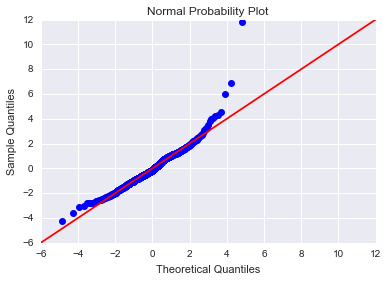

In [55]:
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X=freightdollarnew[['BDI','Dollar_All']].values
y=freightdollarnew['Freight'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [57]:
def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [61]:
rdf_model_freightdoll = fit_predict_model(X_train,y_train)
print (rdf_model_freightdoll.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [62]:
X=freightdollarnew[['BDI','Dollar_All']].values
y=freightdollarnew['Freight'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 1.804, test: 6.036
R^2 train: 0.983, test: 0.950
[ 0.93532832  0.06467168]


In [64]:
freight_dollarpredicted = forest.predict(X)
freight_dollarpredicted = pd.DataFrame(freight_dollarpredicted)
freight_dollarpredicted.columns = ['Predicted_Freight_RDF']
freightdollarnew['Predicted_Freight_RDF'] = freight_dollarpredicted
rdf_error = (abs(freightdollarnew['Predicted_Freight_RDF'] - freightdollarnew['Freight'])/freightdollarnew['Freight'])*100
freightdollarnew['RDF_Error'] = rdf_error
mlr_predicted = 17.0825 + (freightdollarnew['BDI']*0.0044) - (freightdollarnew['Dollar_All']*0.1589)
freightdollarnew['Predicted_Freight_MLR'] = mlr_predicted
mlr_error = (abs(freightdollarnew['Predicted_Freight_MLR'] - freightdollarnew['Freight'])/freightdollarnew['Freight'])*100
freightdollarnew['MLR_Error'] = mlr_error

print("Average RDF error is: %.3f" % (rdf_error.mean())) 
print("Average MLR error is: %.3f" % (mlr_error.mean()))
freightdollarnew

Average RDF error is: 8.961
Average MLR error is: 18.823


,Date,BDI,Freight,Dollar_All,Predicted_Freight_RDF,RDF_Error,Predicted_Freight_MLR,MLR_Error
0,1996-01-05,1583,4.15,85.06,6.575366,58.4426,10.5317,153.775
1,1996-01-12,1550,4.55,85.06,6.731634,47.948,10.3865,128.274
2,1996-01-19,1538,4.55,86.75,7.231727,58.9391,10.0651,121.212
3,1996-01-26,1529,4.55,87.64,6.992028,53.6709,9.8841,117.233
4,1996-02-02,1484,4.6,87.01,7.074405,53.7914,9.78621,112.744
5,1996-02-09,1453,4.6,86.87,7.139253,55.2012,9.67206,110.262
6,1996-02-16,1437,4.15,85.91,7.556909,82.0942,9.7542,135.041
7,1996-02-23,1400,4.25,85.43,7.089876,66.8206,9.66767,127.475
8,1996-03-01,1357,4.35,86.49,7.086489,62.9078,9.31004,114.024
9,1996-03-08,1350,5.5,86.81,7.083197,28.7854,9.22839,67.7889


In [66]:
newpred2 = data [['Date','BDI','Dollar_All']][1006:1056]
newpred = data [['BDI','Dollar_All']][1006:1056]
newpred2

,Date,BDI,Dollar_All
1006,4/17/2015,597,97.520
1007,4/24/2015,600,96.922
1008,5/1/2015,587,95.297
1009,5/8/2015,574,94.794
1010,5/15/2015,634,93.135
1011,5/22/2015,586,96.014
1012,5/29/2015,589,96.907
1013,6/5/2015,610,96.306
1014,6/12/2015,642,94.972
1015,6/19/2015,779,94.085


In [67]:
#new predictions
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date', 'BDI','Dollar_All']
mlr_predictednew = 17.0825 + (newpred2['BDI']*0.0044) - (newpred2['Dollar_All']*0.1589)
newpred2['Predicted_Freight_MLR'] = mlr_predictednew
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Predicted_Freight_RDF'] = df_new_pred
newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

,Date,BDI,Dollar_All,Predicted_Freight_MLR,Predicted_Freight_RDF
0,2015-04-17,597,97.52,4.21337,5.205366
1,2015-04-24,600,96.922,4.32159,5.244937
2,2015-05-01,587,95.297,4.52261,5.414374
3,2015-05-08,574,94.794,4.54533,5.414589
4,2015-05-15,634,93.135,5.07295,5.574042
5,2015-05-22,586,96.014,4.40428,5.377629
6,2015-05-29,589,96.907,4.27558,5.244937
7,2015-06-05,610,96.306,4.46348,5.254001
8,2015-06-12,642,94.972,4.81625,5.406589
9,2015-06-19,779,94.085,5.55999,5.418046


In [68]:
frames = [freightdollarnew,newpred2]
combined = pd.concat(frames)
combined

,BDI,Date,Dollar_All,Freight,MLR_Error,Predicted_Freight_MLR,Predicted_Freight_RDF,RDF_Error
0,1583,1996-01-05,85.06,4.15,153.775,10.5317,6.575366,58.4426
1,1550,1996-01-12,85.06,4.55,128.274,10.3865,6.731634,47.948
2,1538,1996-01-19,86.75,4.55,121.212,10.0651,7.231727,58.9391
3,1529,1996-01-26,87.64,4.55,117.233,9.8841,6.992028,53.6709
4,1484,1996-02-02,87.01,4.6,112.744,9.78621,7.074405,53.7914
5,1453,1996-02-09,86.87,4.6,110.262,9.67206,7.139253,55.2012
6,1437,1996-02-16,85.91,4.15,135.041,9.7542,7.556909,82.0942
7,1400,1996-02-23,85.43,4.25,127.475,9.66767,7.089876,66.8206
8,1357,1996-03-01,86.49,4.35,114.024,9.31004,7.086489,62.9078
9,1350,1996-03-08,86.81,5.5,67.7889,9.22839,7.083197,28.7854


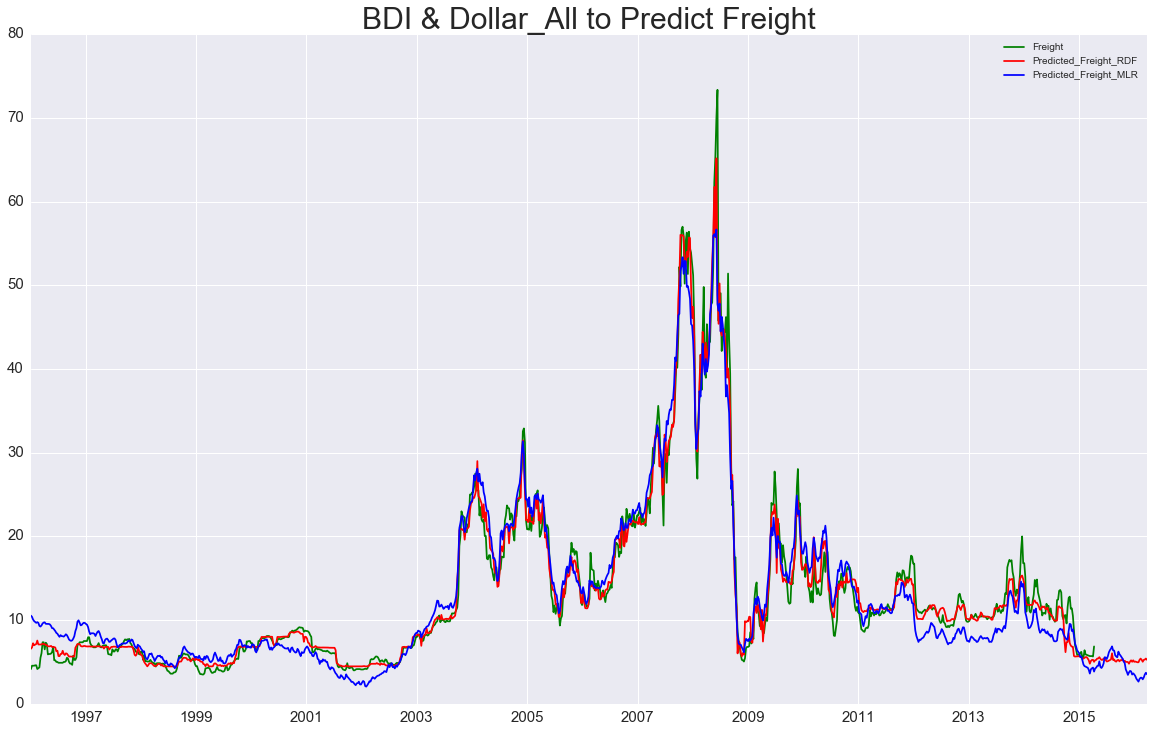

In [69]:
x = (combined['Date'])
y1 = (combined['Freight'])
y2 = (combined['Predicted_Freight_RDF'])
y3 = (combined['Predicted_Freight_MLR'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'r')
ax.plot(x,y3,'b')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('BDI & Dollar_All to Predict Freight', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
plt.show()

In [70]:
combined.to_csv("C:/Users/msteinme/Documents/freightdoll.csv")

## I Want to see how good bdi rdf early model will predict now times to see if can also use to predict future coal in addition to the past

In [71]:
coal_early = data[['Date','BDI','Coal']]
coal_early2 = coal_early.dropna()
coal_early2 = coal_early2[0:211]
coal_early2new = np.array(coal_early2)
coal_early2new = pd.DataFrame(coal_early2new)
coal_early2new.columns = ['Date','BDI','Coal']
coal_early2new.tail()

,Date,BDI,Coal
206,1/30/2004,5551,43.75
207,2/6/2004,5608,43.75
208,2/13/2004,5242,44.5
209,2/20/2004,5516,43.1
210,2/27/2004,5263,43.75


In [72]:
from datetime import datetime
coal_early2new['Date'] = pd.to_datetime(coal_early2new['Date'])
date = coal_early2new['Date']
coal_early2new.dtypes

Date    datetime64[ns]
BDI             object
Coal            object
dtype: object

In [73]:
X = coal_early2new[['BDI']].values
y = coal_early2new['Coal'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 6.715, test: 7.307
R^2 train: 0.719, test: 0.720


In [74]:
coal_predicted_early = forest.predict(X)
coal_predicted_early = pd.DataFrame(coal_predicted_early)
coal_early2new['Predicted_Coal_RDF'] = coal_predicted_early
rdf_error = (abs(coal_early2new['Predicted_Coal_RDF'] - coal_early2new['Coal'])/coal_early2new['Coal'])*100
coal_early2new['RDF_Error'] = rdf_error

print("Average RDF error is: %.3f" % (rdf_error.mean())) #this model looks worse than 
coal_early2new

Average RDF error is: 7.741


,Date,BDI,Coal,Predicted_Coal_RDF,RDF_Error
0,2000-02-18,1454,21.3,27.574804,29.4592
1,2000-02-25,1511,21.3,26.517061,24.4932
2,2000-03-03,1578,20.9,24.487311,17.1642
3,2000-03-10,1645,21,23.702057,12.8669
4,2000-03-17,1630,21,23.907989,13.8476
5,2000-03-24,1618,21,23.850100,13.5719
6,2000-03-31,1660,21,23.606415,12.4115
7,2000-04-07,1684,21.2,23.901127,12.7412
8,2000-04-14,1676,21.4,23.929137,11.8184
9,2000-04-21,1656,21.5,23.640253,9.95466


In [88]:
newpred2 = data [['Date','BDI','Coal']][426:1056]
newpred = data [['BDI']][426:1056]
newpred2

,Date,BDI,Coal
426,3/5/2004,5235,49.80
427,3/12/2004,5352,53.50
428,3/19/2004,5045,53.50
429,3/26/2004,4959,52.60
430,4/2/2004,4716,53.10
431,4/9/2004,4566,55.50
432,4/16/2004,4610,55.80
433,4/23/2004,4461,58.10
434,4/30/2004,3958,58.10
435,5/7/2004,3924,58.10


In [89]:
#new predictions
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date', 'BDI','Coal']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Predicted_Coal_RDF'] = df_new_pred
df_error_pred = (abs(newpred2['Predicted_Coal_RDF'] - newpred2['Coal'])/newpred2['Coal'])*100
newpred2['RDF_Error'] = df_error_pred
newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2 #early model clearly not good at predicting the future value of coal so I will have to use a different model then

,Date,BDI,Coal,Predicted_Coal_RDF,RDF_Error
0,2004-03-05,5235,49.8,43.406857,12.8376
1,2004-03-12,5352,53.5,42.934857,19.7479
2,2004-03-19,5045,53.5,41.627429,22.1917
3,2004-03-26,4959,52.6,40.684857,22.6524
4,2004-04-02,4716,53.1,37.337238,29.6851
5,2004-04-09,4566,55.5,29.119614,47.5322
6,2004-04-16,4610,55.8,29.119614,47.8143
7,2004-04-23,4461,58.1,32.025106,44.8793
8,2004-04-30,3958,58.1,29.627649,49.0058
9,2004-05-07,3924,58.1,29.627649,49.0058
